# CI Portfolio Project 5 - Filter Maintenance Predictor 2023
## **Feature Engineering Notebook**

## Objectives

**1. Cleaning**

Performed within the [data cleaning notebook](https://github.com/roeszler/filter-maintenance-predictor/blob/main/jupyter_notebooks/02_DataCleaning.ipynb).

**2. Data Transformation**
* Processing the data for the modelling stage.
* Transform data into a format that is useful for the algorithm learn the relationship among the variables.
* Evaluate the use of the following approaches to engineer the variables:
    * ordinal categorical encoding
    * numerical transformation
    * smart correlated selection
    
**3. Feature Extraction**
* Evenly distribute dust type

**4. Feature Selection**

**5. Feature Iteration**



### Inputs

1. Cleaned Test Dataset : `outputs/datasets/collection/dfCleanTrain.csv`

2. Cleaned Train Dataset : `outputs/datasets/collection/dfCleanTrain.csv`

### Outputs

* Generate engineered Train and Test sets, both saved under `outputs/datasets/transformed`

### Conclusions

  * Best approach to engineer variables based on...
  * Transformations that we will consider in our pipeline are...

---

# Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("Current directory set to new location")

Current directory set to new location


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor'

---

# Load Cleaned Data

In [4]:
import pandas as pd
df_total = pd.read_csv(f'outputs/datasets/cleaned/dfCleanTotal.csv')

---

# Data Transformation

## Feature Extraction

It is important to define
* Feature Extraction: **creates** new features from functions of the original features.
* Feature Selection: allows us to **choose** a subset of the features for use in model construction.

Feature selection assumes that the data contains some features that are either **surplus**, **redundant** or **irrelevant** to the final business goal and can therefore be removed without incurring much loss of predictive power.

### Add Quantitative Calculations
The dataset is made up of variables that can be physically quantified from the current data and used to calculate descriptive measures into the future. These calculations in the data are described at the [initial data engineering section](https://github.com/roeszler/filter-maintenance-predictor/blob/main/README.md#4-initial-data-engineering-1) of the readme file:

In [5]:
df_total.loc[444:453]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  \
444        1             228.045400  55.042882  44.5  236.428943   
445        1             227.955000  55.127185  44.6  236.428943   
446        1             230.486800  55.070987  44.7  236.428943   
447        1             227.955000  55.052254  44.8  236.428943   
448        1             227.955000  55.305573  44.9  236.428943   
449        2               0.994647  53.225440   0.1  236.428943   
450        2               0.542535  55.080360   0.2  236.428943   
451        2               1.085069  56.179876   0.3  236.428943   
452        2               2.350984  56.229550   0.4  236.428943   
453        2               4.159433  56.438195   0.5  236.428943   

                                 Dust  RUL  
444  ISO 12103-1, A3 Medium Test Dust  NaN  
445  ISO 12103-1, A3 Medium Test Dust  NaN  
446  ISO 12103-1, A3 Medium Test Dust  NaN  
447  ISO 12103-1, A3 Medium Test Dust  NaN  
448  ISO 12103-1, A3 Medium Test Dust  NaN  
449  ISO 12103-1, A3 Medium Test Dust  NaN  
450  ISO 12103-1, A3 Medium Test Dust  NaN  
451  ISO 12103-1, A3 Medium Test Dust  NaN  
452  ISO 12103-1, A3 Medium Test Dust  NaN  
453  ISO 12103-1, A3 Medium Test Dust  NaN

#### Convert Categorical `Dust` to Floating Number
Derived from the business requirements, we know that the **Dust** categorical variable has a floating number equivalent:
* ISO 12103-1, A2 Fine Test Dust = **0.900** g/m<sup>3</sup>
* ISO 12103-1, A3 Medium Test Dust = **1.025** g/m<sup>3</sup>
* ISO 12103-1, A4 Coarse Test Dust = **1.200** g/m<sup>3</sup>

Convert the set

In [6]:
dust_density_total = [0.900 if n == 'ISO 12103-1, A2 Fine Test Dust' else (1.025 if n == 'ISO 12103-1, A3 Medium Test Dust' else 1.200) for n in df_total['Dust']]
df_total['Dust'] = dust_density_total
df_total

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  RUL
0            1                 0.0000   0.000000   0.1  236.428943  1.025  NaN
1            1                 0.0000   0.000000   0.2  236.428943  1.025  NaN
2            1                 0.0000   0.000000   0.3  236.428943  1.025  NaN
3            1                 0.0000   0.000000   0.4  236.428943  1.025  NaN
4            1                 0.0000   0.000000   0.5  236.428943  1.025  NaN
...        ...                    ...        ...   ...         ...    ...  ...
78829      100               465.4948  82.675521  52.0  316.985065  1.200  8.2
78830      100               464.2289  82.421873  52.1  316.985065  1.200  8.1
78831      100               466.0373  82.743156  52.2  316.985065  1.200  8.0
78832      100               472.2765  82.785427  52.3  316.985065  1.200  7.9
78833      100               474.1754  83.013710  52.4  316.985065  1.200  7.8

[78834 rows x 7 columns]

Confirm the `Dust` **data type** has changed

In [7]:
df_total['Dust'].dtype

dtype('float64')

#### Add Mass Calculation
Mass per observation

In [8]:
df_total.loc[:,('mass_g')] = (df_total.Dust_feed/1000)*df_total.Dust
df_total.loc[444:453]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  RUL  \
444        1             228.045400  55.042882  44.5  236.428943  1.025  NaN   
445        1             227.955000  55.127185  44.6  236.428943  1.025  NaN   
446        1             230.486800  55.070987  44.7  236.428943  1.025  NaN   
447        1             227.955000  55.052254  44.8  236.428943  1.025  NaN   
448        1             227.955000  55.305573  44.9  236.428943  1.025  NaN   
449        2               0.994647  53.225440   0.1  236.428943  1.025  NaN   
450        2               0.542535  55.080360   0.2  236.428943  1.025  NaN   
451        2               1.085069  56.179876   0.3  236.428943  1.025  NaN   
452        2               2.350984  56.229550   0.4  236.428943  1.025  NaN   
453        2               4.159433  56.438195   0.5  236.428943  1.025  NaN   

      mass_g  
444  0.24234  
445  0.24234  
446  0.24234  
447  0.24234  
448  0.24234  
449  0.24234  
450  0.24234  
451  0.24234  
452  0.24234  
453  0.24234

Cumulative Mass

In [9]:
data = df_total.Data_No
df_total['cumulative_mass_g'] = df_total['mass_g'].groupby(data).cumsum()
df_total.loc[444:453]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  RUL  \
444        1             228.045400  55.042882  44.5  236.428943  1.025  NaN   
445        1             227.955000  55.127185  44.6  236.428943  1.025  NaN   
446        1             230.486800  55.070987  44.7  236.428943  1.025  NaN   
447        1             227.955000  55.052254  44.8  236.428943  1.025  NaN   
448        1             227.955000  55.305573  44.9  236.428943  1.025  NaN   
449        2               0.994647  53.225440   0.1  236.428943  1.025  NaN   
450        2               0.542535  55.080360   0.2  236.428943  1.025  NaN   
451        2               1.085069  56.179876   0.3  236.428943  1.025  NaN   
452        2               2.350984  56.229550   0.4  236.428943  1.025  NaN   
453        2               4.159433  56.438195   0.5  236.428943  1.025  NaN   

      mass_g  cumulative_mass_g  
444  0.24234         107.841152  
445  0.24234         108.083491  
446  0.24234         108.325831  
447  0.24234         108.568171  
448  0.24234         108.810510  
449  0.24234           0.242340  
450  0.24234           0.484679  
451  0.24234           0.727019  
452  0.24234           0.969359  
453  0.24234           1.211698

#### Add Total Time of Test
Retrieve the total time for each test

In [10]:
time_total = df_total['Time'].groupby(data).max().to_frame()
time_total.index.name = None
time_total['Data_No'] = time_total.index
time_total.head()

Time  Data_No
1  44.9        1
2  44.9        2
3  44.9        3
4  89.7        4
5  89.7        5

Map the total time to each observation and place it in the dataset

In [11]:
total_test_time = df_total['Data_No'].map(time_total.set_index('Data_No')['Time'])
df_total['Tt'] = total_test_time
df_total.loc[444:453]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  RUL  \
444        1             228.045400  55.042882  44.5  236.428943  1.025  NaN   
445        1             227.955000  55.127185  44.6  236.428943  1.025  NaN   
446        1             230.486800  55.070987  44.7  236.428943  1.025  NaN   
447        1             227.955000  55.052254  44.8  236.428943  1.025  NaN   
448        1             227.955000  55.305573  44.9  236.428943  1.025  NaN   
449        2               0.994647  53.225440   0.1  236.428943  1.025  NaN   
450        2               0.542535  55.080360   0.2  236.428943  1.025  NaN   
451        2               1.085069  56.179876   0.3  236.428943  1.025  NaN   
452        2               2.350984  56.229550   0.4  236.428943  1.025  NaN   
453        2               4.159433  56.438195   0.5  236.428943  1.025  NaN   

      mass_g  cumulative_mass_g    Tt  
444  0.24234         107.841152  44.9  
445  0.24234         108.083491  44.9  
446  0.24234         108.325831  44.9  
447  0.24234         108.568171  44.9  
448  0.24234         108.810510  44.9  
449  0.24234           0.242340  44.9  
450  0.24234           0.484679  44.9  
451  0.24234           0.727019  44.9  
452  0.24234           0.969359  44.9  
453  0.24234           1.211698  44.9

#### Filter Balance %
Calculation to represent the balance to 600Pa `differential_pressure`. At the last value of the dataset, it indicates the amount of **right censoring** has ocurred to each data bin.

In [12]:
test_data = df_total['Differential_pressure']
df_censor_test = (((600 - test_data)/600)*100).round(decimals = 2)
df_censor_test.loc[444:453]

444    61.99
445    62.01
446    61.59
447    62.01
448    62.01
449    99.83
450    99.91
451    99.82
452    99.61
453    99.31
Name: Differential_pressure, dtype: float64

In [13]:
df_total['filter_balance'] = df_censor_test
df_total.loc[444:453]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  RUL  \
444        1             228.045400  55.042882  44.5  236.428943  1.025  NaN   
445        1             227.955000  55.127185  44.6  236.428943  1.025  NaN   
446        1             230.486800  55.070987  44.7  236.428943  1.025  NaN   
447        1             227.955000  55.052254  44.8  236.428943  1.025  NaN   
448        1             227.955000  55.305573  44.9  236.428943  1.025  NaN   
449        2               0.994647  53.225440   0.1  236.428943  1.025  NaN   
450        2               0.542535  55.080360   0.2  236.428943  1.025  NaN   
451        2               1.085069  56.179876   0.3  236.428943  1.025  NaN   
452        2               2.350984  56.229550   0.4  236.428943  1.025  NaN   
453        2               4.159433  56.438195   0.5  236.428943  1.025  NaN   

      mass_g  cumulative_mass_g    Tt  filter_balance  
444  0.24234         107.841152  44.9           61.99  
445  0.24234         108.083491  44.9           62.01  
446  0.24234         108.325831  44.9           61.59  
447  0.24234         108.568171  44.9           62.01  
448  0.24234         108.810510  44.9           62.01  
449  0.24234           0.242340  44.9           99.83  
450  0.24234           0.484679  44.9           99.91  
451  0.24234           0.727019  44.9           99.82  
452  0.24234           0.969359  44.9           99.61  
453  0.24234           1.211698  44.9           99.31

#### Predict RUL
Review the last values of each data bin

In [14]:
df_total[df_total.Data_No != df_total.Data_No.shift(-1)].head()

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  RUL  \
448         1               227.9550  55.305573  44.9  236.428943  1.025  NaN   
897         2               196.6688  56.438195  44.9  236.428943  1.025  NaN   
1346        3               350.9295  56.378582  44.9  236.428943  1.025  NaN   
2243        4               228.2263  80.966570  89.7  118.214472  1.025  NaN   
3140        5               358.0729  81.872306  89.7  118.214472  1.025  NaN   

       mass_g  cumulative_mass_g    Tt  filter_balance  
448   0.24234         108.810510  44.9           62.01  
897   0.24234         108.810510  44.9           67.22  
1346  0.24234         108.810510  44.9           41.51  
2243  0.12117         108.689341  89.7           61.96  
3140  0.12117         108.689341  89.7           40.32

In [15]:
df_total[df_total.Data_No != df_total.Data_No.shift(1)].tail()

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  Dust  \
75134       96                    0.0  50.196716   0.1  237.738799   0.9   
75284       97                    0.0  43.138538   0.2  236.428943   0.9   
75542       98                    0.0  36.763793   0.2  316.985065   0.9   
75828       99                    0.0  29.191847   0.1   59.107236   1.2   
78310      100                    0.0   0.000000   0.1  316.985065   1.2   

         RUL    mass_g  cumulative_mass_g     Tt  filter_balance  
75134   27.1  0.213965           0.213965   15.0           100.0  
75284   37.9  0.212786           0.212786   25.9           100.0  
75542   42.0  0.285287           0.285287   28.7           100.0  
75828  281.9  0.070929           0.070929  248.2           100.0  
78310   60.1  0.380382           0.380382   52.4           100.0

Visualization of sample target variable to predict RUL
* Failure of filter (end of useful life) considered at 600Pa difference in pressure

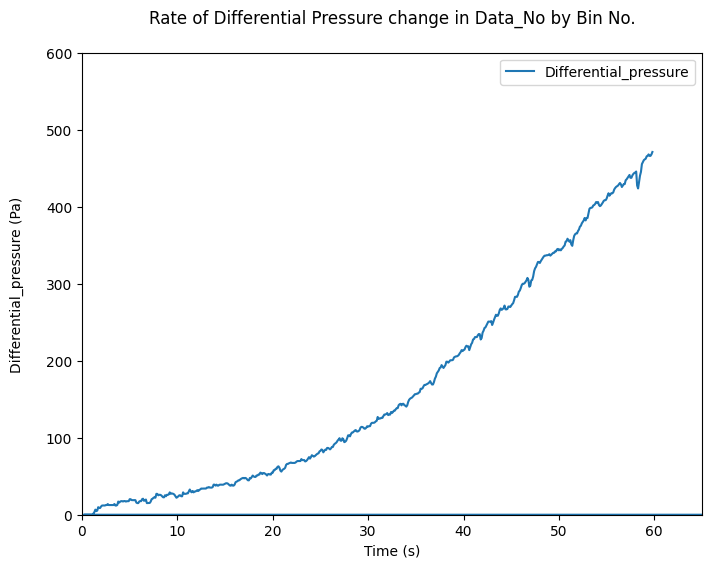

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_bin = df_total[df_total['Data_No'] == 28]
df_bin.plot(kind='line',
            x='Time',
            y='Differential_pressure',
            xlim=(0,65),
            ylim=(0,600),
            figsize=(8,6),
            title='Rate of Differential Pressure change in Data_No by Bin No.\n',
            xlabel='Time (s)',
            ylabel='Differential_pressure (Pa)\n'
        )
plt.show()
df_bin.tail(6).style.hide(['RUL'], axis="columns")

#### RUL Calculation
As discussed at the [splitting datasets](https://github.com/roeszler/filter-maintenance-predictor/blob/main/README.md#test-train-validation-data) section of the readme: 
* The Remaining Useful Life variable has been supplied with live data in the **test** dataset and not recorded for the **training** dataset. 
* Notwithstanding, **RUL is a calculated measure** and is useful to add additional observations to the total dataset to be included in analysis.
    * Only `Differential Pressure` values reaching 600 Pa or more indicate the test group has reached the end of it's remaining useful life.
* Calculating the RUL also aids to highlight the expected correlation to the `Differential Pressure` and `Time` variables, where:

<p style="text-align: center; font-size: 1rem;">Remaining Useful Life (RUL) = Total time (cycles) to failure for each life test (T) - current time (t)</p>
<p style="text-align: center; font-size: 0.9rem;"><i>Where: Failure for each life test = Differential Pressure at 600 Pa</i></p>


To test the function, here we will compare the **actual RUL** values supplied to the **calculated RUL** values.

Retrieve the **df_test** dataset (including a current version of **df_train** for good measure)

In [17]:
df_total

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust  \
0            1                 0.0000   0.000000   0.1  236.428943  1.025   
1            1                 0.0000   0.000000   0.2  236.428943  1.025   
2            1                 0.0000   0.000000   0.3  236.428943  1.025   
3            1                 0.0000   0.000000   0.4  236.428943  1.025   
4            1                 0.0000   0.000000   0.5  236.428943  1.025   
...        ...                    ...        ...   ...         ...    ...   
78829      100               465.4948  82.675521  52.0  316.985065  1.200   
78830      100               464.2289  82.421873  52.1  316.985065  1.200   
78831      100               466.0373  82.743156  52.2  316.985065  1.200   
78832      100               472.2765  82.785427  52.3  316.985065  1.200   
78833      100               474.1754  83.013710  52.4  316.985065  1.200   

       RUL    mass_g  cumulative_mass_g    Tt  filter_balance  
0      NaN  0.242340           0.242340  44.9          100.00  
1      NaN  0.242340           0.484679  44.9          100.00  
2      NaN  0.242340           0.727019  44.9          100.00  
3      NaN  0.242340           0.969359  44.9          100.00  
4      NaN  0.242340           1.211698  44.9          100.00  
...    ...       ...                ...   ...             ...  
78829  8.2  0.380382         197.798681  52.4           22.42  
78830  8.1  0.380382         198.179063  52.4           22.63  
78831  8.0  0.380382         198.559445  52.4           22.33  
78832  7.9  0.380382         198.939827  52.4           21.29  
78833  7.8  0.380382         199.320209  52.4           20.97  

[78834 rows x 11 columns]

Split the datasets

In [18]:
data_no_total = df_total['Data_No'].map(int).round(decimals=0)
df_total['Data_No'] = data_no_total
n = df_total['Data_No'][0:len(df_total)]
df_train = df_total[n < 51].reset_index(drop=True)
df_test = df_total[n > 50].reset_index(drop=True)

**Calculate RUL** and include it back into the **df_total** dataset

In [19]:
del df_train['RUL']
rul = (df_train.loc[:,('Tt')] - df_train.loc[:,('Time')])
df_train.insert(loc=6, column='RUL', value=rul)
df_total = pd.concat([df_train, df_test], ignore_index = True)
df_train.loc[36878:36883]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  Dust  \
36878       46               589.8257  83.005263  62.4  118.214472   0.9   
36879       46               596.0648  83.209944  62.5  118.214472   0.9   
36880       46               607.9102  83.219026  62.6  118.214472   0.9   
36881       47                 0.0000  35.161137   0.1   79.246266   0.9   
36882       47                 0.0000  52.935015   0.2   79.246266   0.9   
36883       47                 0.0000  57.426940   0.3   79.246266   0.9   

         RUL    mass_g  cumulative_mass_g     Tt  filter_balance  
36878    0.2  0.106393          66.389247   62.6            1.70  
36879    0.1  0.106393          66.495640   62.6            0.66  
36880    0.0  0.106393          66.602033   62.6           -1.32  
36881  104.5  0.071322           0.071322  104.6          100.00  
36882  104.4  0.071322           0.142643  104.6          100.00  
36883  104.3  0.071322           0.213965  104.6          100.00

---

## Ordinal Categorical Encoding

#### Replacing categories with ordinal numbers 
The dataset as two categorical features, **Data_No** and **Dust**.

These have been been transformed in the **01_DataCollection** notebook to assist us with the manipulation of the data.  They are in the format we desire at this point. We may need to transform these back into their respective categorical values, however this won't be performed until required.

## Numerical Transformations

This process can consider transformers like:
* Smooth with SMA
* Logarithmic in base e
* Logarithmic in base 10
* Reciprocal
* Power
* BoxCox
* Yeo Johnson

The dataset has several numerical features to assess. A [custom function](https://github.com/Code-Institute-Solutions/churnometer/blob/main/jupyter_notebooks/04%20-%20FeatureEngineering.ipynb) found at the [code institute] has been included as a quick way to represent the data for evaluation. 

Including the full report into this notebook made it a little unwieldy. It has been included as a separate visualization notebook at [04_FE_Visualization.ipynb](https://github.com/roeszler/filter-maintenance-predictor/blob/main/jupyter_notebooks/04_FE_Visualization.ipynb) optionally for your review. 

**In summary**, it reveals:
* BoxCox and Yeo Johnson for most variables improve `Time` and `Differential Pressure` features, however the existence of negative **differential pressure** values present a challenge to log transform this data.
* Due to the [value of log transformation](https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution) to regression models, the following notebook follows a modification and filtering of the data to remove negative values and apply a log transformation. 
* Notwithstanding, a **Modified Log Transformed**, **BoxCox** and **Yeo Johnson** will be considered at each modelling stage to evaluate their effects on model performance. 

## Change in Differential Pressure
Include change in Differential Pressure calculation

**Note**: We replace first instance of `change_DP` with first value of `differential_pressure` in the new bin. 
* This signifies that the fist observation starts from a **zero** DP value.

In [20]:
df_change_dp = pd.DataFrame()

list_data_nos = list(df_total['Data_No'].unique())
for n in list_data_nos:
    if (df_total.Data_No != df_total.Data_No.shift(1)).any().any():
        df_bin = df_total[df_total['Data_No'] == n]

        change_dp_calc = df_bin['Differential_pressure'].diff().fillna(df_bin['Differential_pressure'])
        df_bin.insert(loc=7, column='change_DP', value=change_dp_calc)

        df_change_dp = pd.concat([df_change_dp, df_bin], ignore_index = True)
df_total = df_change_dp
df_total.loc[446:451]

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed   Dust   RUL  \
446        1             230.486800  55.070987  44.7  236.428943  1.025   0.2   
447        1             227.955000  55.052254  44.8  236.428943  1.025   0.1   
448        1             227.955000  55.305573  44.9  236.428943  1.025   0.0   
449        2               0.994647  53.225440   0.1  236.428943  1.025  44.8   
450        2               0.542535  55.080360   0.2  236.428943  1.025  44.7   
451        2               1.085069  56.179876   0.3  236.428943  1.025  44.6   

     change_DP   mass_g  cumulative_mass_g    Tt  filter_balance  
446   2.531800  0.24234         108.325831  44.9           61.59  
447  -2.531800  0.24234         108.568171  44.9           62.01  
448   0.000000  0.24234         108.810510  44.9           62.01  
449   0.994647  0.24234           0.242340  44.9           99.83  
450  -0.452112  0.24234           0.484679  44.9           99.91  
451   0.542534  0.24234           0.727019  44.9           99.82

**Note**: Part of the challenge with this data is dealing with a continuous dataset that is comprised of data 'bins'. Each `Data_No` data bin represents an individual test cycle. 

When engineering **descriptive statistics** into the dataset, that typically used a sample of the previous values to indicate a mean or standard deviation, **we need to treat each bin individually** and not progress the first row of each bin incorrectly with the last rows of the previous bin.

To solve this, we use a sequential loop that proceeds through each bin and inserts a progressive descriptive statistic calculation like change in differential pressure (`change_DP`) and appends it to the previous bin. This eventually creates a version of the dataset that includes the new calculation.

### Outliers in differential pressure observations

In each bin we notice that the size and direction of the `change_DP` measure occasionally produces a zero or negative value. This highlights a fluctuation in the **differential pressures**. These may be considered outliers as the pressure gradient across the filter needs time to stabilize. We have considered three main methods to deal with these observations:
* Log transformation
* Winsorize method
* Dropping the outliers

These will be handled in the [feature engineering](https://github.com/roeszler/filter-maintenance-predictor/blob/main/jupyter_notebooks/03_FeatureEngineering.ipynb) notebook

**Random sample** (Bin 96) to plot and inspect change in Differential Pressure distributions

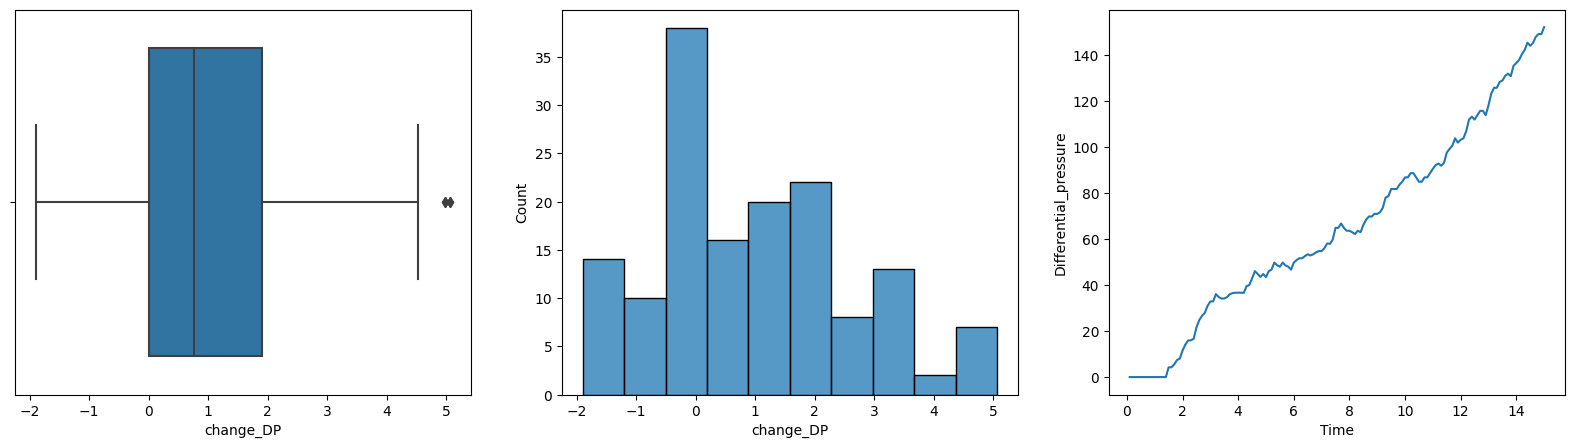

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

bin_96 = df_total[df_total['Data_No'] == 96]
sns.boxplot(x = bin_96['change_DP'], ax=ax1)
sns.histplot(x = bin_96['change_DP'], ax=ax2)
sns.lineplot(x=bin_96['Time'], y=bin_96['Differential_pressure'], ax=ax3)
plt.show()

### Smoothing of **Differential Pressure**
*Dealing with outliers in differential pressure observations*

In each bin note `differential_pressure` and `change_DP` observations. Occasionally the measures fluctuate outside of the general trend of the data (outliers). This can be seen below in the **second to last** observation of Data_No bin 98 (index no. 75826) where the recorded value is outside the general trend of the data. 

In [22]:
df_total[df_total['Data_No'] == 98].tail()

Data_No  Differential_pressure  Flow_rate  Time   Dust_feed  Dust  \
75823       98               231.1198  58.831609  28.3  316.985065   0.9   
75824       98               231.6623  59.295392  28.4  316.985065   0.9   
75825       98               231.9336  58.842588  28.5  316.985065   0.9   
75826       98               236.3643  58.842588  28.6  316.985065   0.9   
75827       98               231.8432  58.853552  28.7  316.985065   0.9   

        RUL  change_DP    mass_g  cumulative_mass_g    Tt  filter_balance  
75823  13.9     2.2606  0.285287          80.450810  28.7           61.48  
75824  13.8     0.5425  0.285287          80.736096  28.7           61.39  
75825  13.7     0.2713  0.285287          81.021383  28.7           61.34  
75826  13.6     4.4307  0.285287          81.306669  28.7           60.61  
75827  13.5    -4.5211  0.285287          81.591956  28.7           61.36

<!-- To quantify such measures, have considered a tolerance of ±200% change in value, however this can be altered depending on what we see when fitting the models. -->

To **smooth** the variability of this measure we can apply a **mean** (or average) value to the data in various ways. 
This attempts to soften the severity of changes seen and reduce the instances of values that are higher / lower than the general trend. It will effectively reduce variability in the **differential pressure** measure, making it easier to model.

We have considered the following methods to deal with outliers:
* Smooth with Simple Mean Average (SMA)
* Exponentially Weighted Mean (EWM)
* Log transformation
* Dropping the outliers
* Winsorize method

For each calculation that uses previous observations to produce a value, we can **use the same process we applied to manage the unique data bins** as we did in calculating change in differential pressure above.

#### Smoothing of Differential Pressure with a **Simple Moving Average** (SMA)
A simple moving average (SMA) is an arithmetic **moving average** calculated by adding recent values (the last four measures in this case), then dividing that by the number of observations in the calculation. This moves along as the observations progresses.

* We can see the first four observations are **NaN** indicated. 
    * These could be imputed with arbitrary values, mean values, closest k sample values and/or a MICE (Multiple Imputation by Chained Equations) value that fits a linear regression with the present values.
    * On review, the MICE method would be the preferred method to impute the missing SMA values, **however**: considering the progressive nature of the `differential_pressure` variable, a preferable alternate to SMA would be Exponentially Weighted Mean (EWM).

#### Smoothing of Differential Pressure with an **Exponentially Weighted Mean** (EWM)
Is a measure of the moving average that considers older observations to have given lower weightings in the calculation. The weights fall exponentially as the data point gets older – hence the name exponentially weighted.

* The EWM is calculated with a 4 point EWM (`span=4`) measure, that considers the previous 4 observations to calculate the weighted mean.


In [23]:
df_means = pd.DataFrame()

list_data_nos = list(df_total['Data_No'].unique())
for n in list_data_nos:
    if (df_total.Data_No != df_total.Data_No.shift(1)).any().any():
        df_bin = df_total[df_total['Data_No'] == n]

        ewm_calc = df_bin['Differential_pressure'].ewm(span=4, adjust=False).mean()
        df_bin.insert(loc=2, column='4point_EWM', value=ewm_calc)

        sma_calc = df_bin['Differential_pressure'].rolling(4).mean()
        df_bin.insert(loc=2, column='4point_SMA', value=sma_calc)

        change_ewm_calc = df_bin['4point_EWM'].diff().fillna(df_bin['4point_EWM'])
        df_bin.insert(loc=10, column='change_EWM', value=change_ewm_calc)

        df_means = pd.concat([df_means, df_bin], ignore_index = True)
df_total = df_means
df_total.loc[446:451]

Data_No  Differential_pressure  4point_SMA  4point_EWM  Flow_rate  Time  \
446        1             230.486800  227.661125  227.059478  55.070987  44.7   
447        1             227.955000  228.610550  227.417687  55.052254  44.8   
448        1             227.955000  228.587950  227.632612  55.305573  44.9   
449        2               0.994647         NaN    0.994647  53.225440   0.1   
450        2               0.542535         NaN    0.813802  55.080360   0.2   
451        2               1.085069         NaN    0.922309  56.179876   0.3   

      Dust_feed   Dust   RUL  change_DP  change_EWM   mass_g  \
446  236.428943  1.025   0.2   2.531800    2.284881  0.24234   
447  236.428943  1.025   0.1  -2.531800    0.358209  0.24234   
448  236.428943  1.025   0.0   0.000000    0.214925  0.24234   
449  236.428943  1.025  44.8   0.994647    0.994647  0.24234   
450  236.428943  1.025  44.7  -0.452112   -0.180845  0.24234   
451  236.428943  1.025  44.6   0.542534    0.108507  0.24234   

     cumulative_mass_g    Tt  filter_balance  
446         108.325831  44.9           61.59  
447         108.568171  44.9           62.01  
448         108.810510  44.9           62.01  
449           0.242340  44.9           99.83  
450           0.484679  44.9           99.91  
451           0.727019  44.9           99.82

### **Logarithmic Transformation** of Differential Pressure

As seen at data collection, the original continuous `differential_pressure` data is right or **positively skewed** at 1.81 and does not follow the shape of a normally distributed bell curve.
* Included a plot for both instances of the **moving average smoothed** variable to check that it is representative of the **differential_pressure** source, which it is.


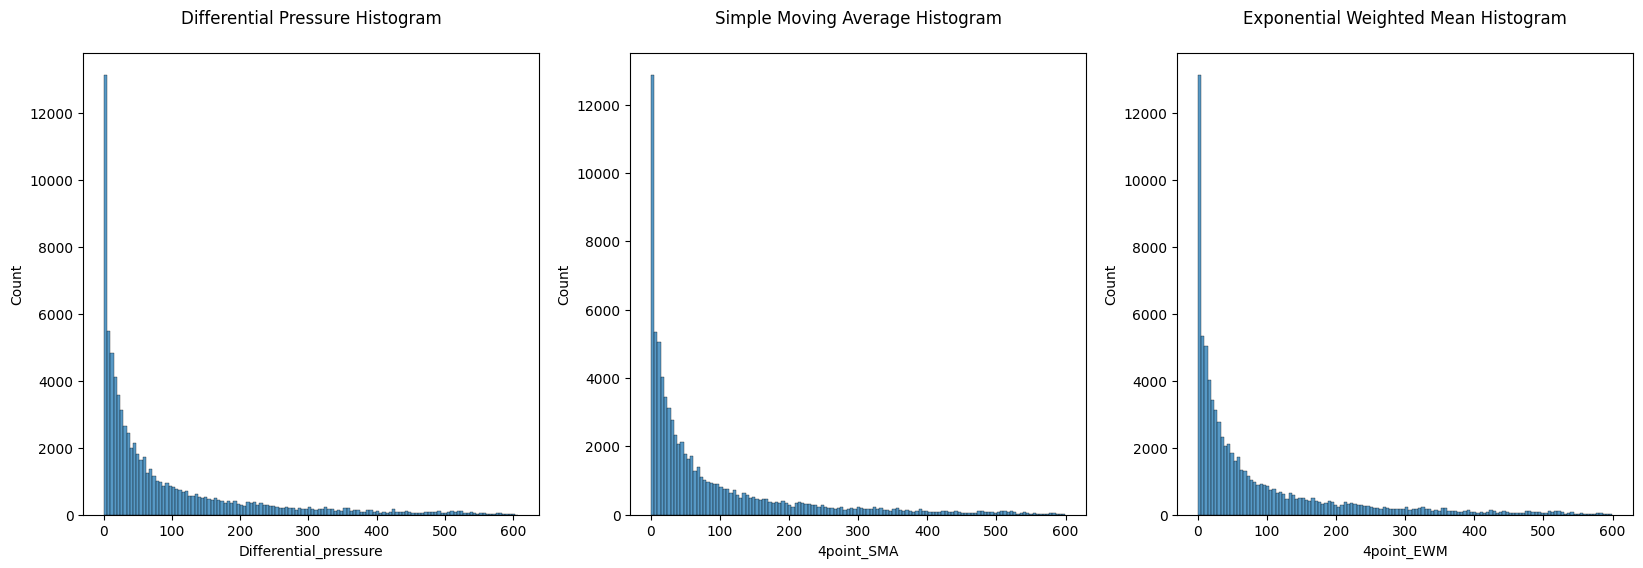

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

sns.histplot(x = df_total['Differential_pressure'], ax=ax1)
sns.histplot(x = df_total['4point_SMA'], ax=ax2)
sns.histplot(x = df_total['4point_EWM'], ax=ax3)

ax1.title.set_text('Differential Pressure Histogram\n')
ax2.title.set_text('Simple Moving Average Histogram\n')
ax3.title.set_text('Exponential Weighted Mean Histogram\n')
plt.show()

A **log transformation** of this data will represent the values within a normal distribution, **as much as possible**, allowing a more valid statistical analysis from this data.

/workspace/.pip-modules/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/workspace/.pip-modules/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


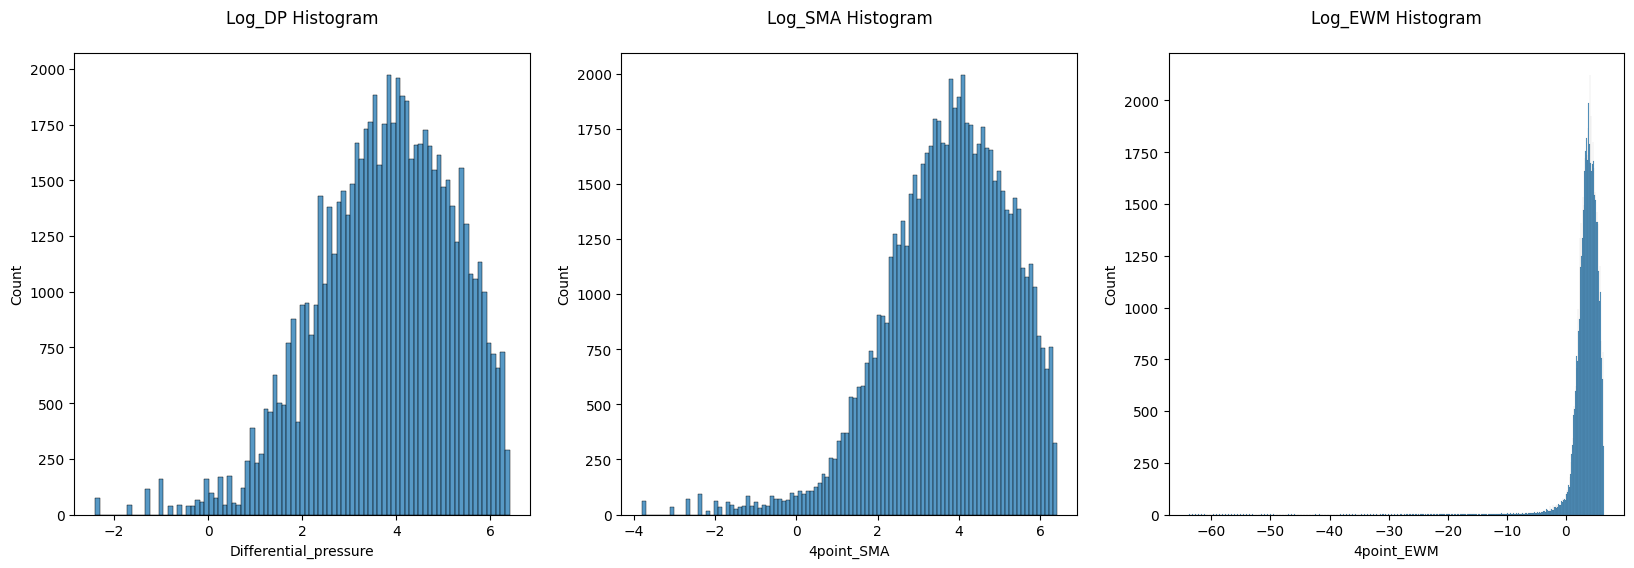

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))

df_total_log_dp = df_total['Differential_pressure']
log_dp = np.log(df_total_log_dp)
sns.histplot(x = log_dp, ax=ax1)

df_total_log_sma = df_total['4point_SMA']
log_sma = np.log(df_total_log_sma)
sns.histplot(x = log_sma, ax=ax2)

df_total_log_ewm = df_total['4point_EWM']
log_ewm = np.log(df_total_log_ewm)
sns.histplot(x = log_ewm, ax=ax3)
ax1.title.set_text('Log_DP Histogram\n')
ax2.title.set_text('Log_SMA Histogram\n')
ax3.title.set_text('Log_EWM Histogram\n')
plt.show()

**Observations** 
* The shape of the numerical differential pressure data is **improved** by a natural logarithmic transformation.

The transformed data is still affected by the negative skew in the data:
* Pressure measures show values at zero or below at the beginning and tail of the data. This is amplified when we transform the mean data sets.
    * The instances of negative numbers can be managed by:
        * Adding a constant to stop the value becoming negative, or 
        * Indicate the negative as a missing number or 
        * Dropping the entire observation
    * Considering these measures tend to fall in zones at the beginning or end of the test where the procedure takes a while to 'equalize' or has passed the point of filter failure, we have decided to treat them as outliers and confidently drop the entire row these observation sits within without impacting the power of the models.

**Further EWM transformation**

Remove rows with negative numbers in `4pointWEM` column

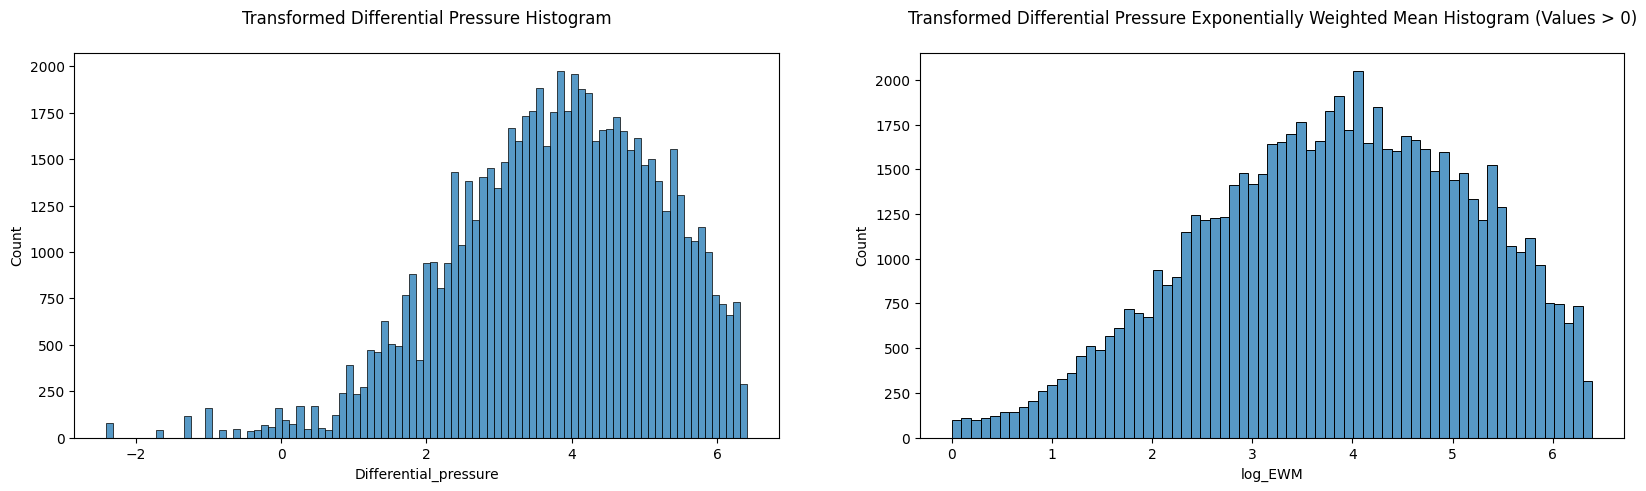

Old Shape:  (78834, 7)
New Shape:  (69686, 16)


In [26]:
# Remove Negative values
df_total.insert(loc=4, column='log_EWM', value=log_ewm)
data = df_total.loc[:, df_total.columns == 'log_EWM']
df_total = df_total[data.select_dtypes(include=[np.number]).ge(-0).all(1)]

# Visualize the data
old_shape = pd.read_csv(f'outputs/datasets/cleaned/dfCleanTotal.csv')
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

sns.histplot(x = log_dp, ax=ax1)
sns.histplot(x = df_total['log_EWM'], ax=ax2)

plt.title('log_EWM Histogram')
ax1.title.set_text('Transformed Differential Pressure Histogram\n')
ax2.title.set_text('Transformed Differential Pressure Exponentially Weighted Mean Histogram (Values > 0)\n')
plt.show()
print("Old Shape: ", old_shape.shape)
print("New Shape: ", df_total.shape)

This transformed data is far more useable to train the model. 
* Less variability 
* Negative values removed
* Minimal loss of data

## Further Management of Outliers
Dropping all negative numbers to reduce the noise of the data

#### Evaluation of detecting outliers using **Inter Quartile Range** (IQR).

Old Shape:  (69686, 16)
New Shape:  (69686, 16)


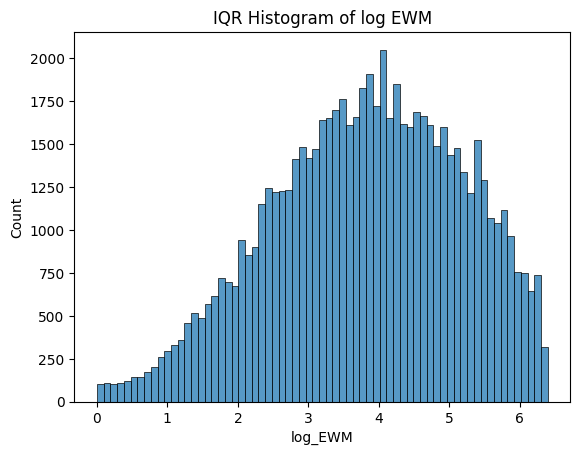

In [27]:
df_total_IQR = df_total.copy()

# IQR
Q1 = np.percentile(df_total_IQR, 25, method='midpoint')
Q3 = np.percentile(df_total_IQR, 75, method='midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df_total_IQR.shape)
 
# Upper bound
upper = np.where(df_total_IQR >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_total_IQR <= (Q1-1.5*IQR))
 
# Removing the Outliers
df_total_IQR.drop(upper[0], inplace = True)
df_total_IQR.drop(lower[0], inplace = True)
 
print("New Shape: ", df_total_IQR.shape)

df_total_log_IQR = df_total_IQR['log_EWM']
log_dp_IQR = np.log(df_total_log_IQR)
sns.histplot(x = df_total_log_IQR)
plt.title('IQR Histogram of log EWM')
plt.show()

IQR transformation is not particularly effective on this data with negative values removed. We will not apply this method and proceed with other techniques.

#### **The Winsorize Method**
Winsorization is the process of replacing the extreme values of statistical data in order to limit the effect of the outliers on the calculations or the results obtained by using that data. To apply this to a our exponentially logged differential pressure `log_EWM` variable, where outliers are present only at one end of the data:
* The lower 10% values of the data will have their values set equal to the value of the data point at the 10th percentile.

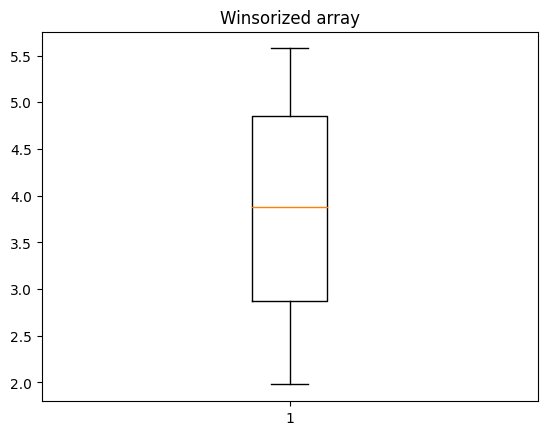

Old Mean:  3.8140198177644837
New Mean:  3.8430543225205263


In [28]:
from scipy.stats.mstats import winsorize

WinsorizedArrayMean = np.mean(df_total['log_EWM'])
winz_EWM = winsorize(df_total['log_EWM'],(0.1,0.1))
df_total.insert(loc=5, column='winz_EWM', value=winz_EWM)
WinsorizedArray = df_total['winz_EWM']
plt.boxplot(WinsorizedArray)
plt.title('Winsorized array')
plt.show()
WinsorizedArrayNewMean = np.mean(WinsorizedArray)
print('Old Mean: ', WinsorizedArrayMean)
print('New Mean: ', WinsorizedArrayNewMean)

<AxesSubplot: xlabel='winz_EWM', ylabel='Count'>

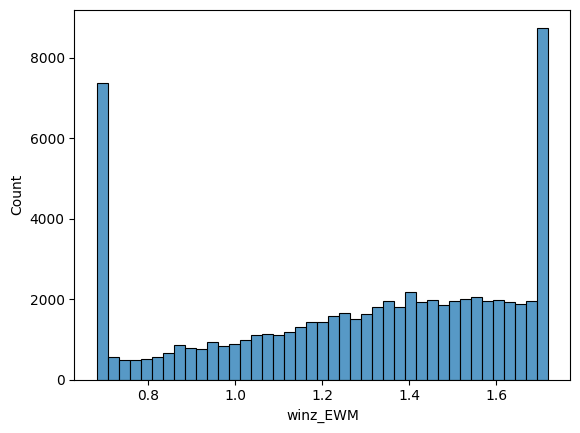

In [29]:
df_total_log_winz = df_total['winz_EWM']
log_winz = np.log(df_total_log_winz)
sns.histplot(x = log_winz)
plt.show()

Winzorization smooths the data too much and does not add much value to training our models so we will not apply this method either. 

In [30]:
del df_total['winz_EWM']
del df_total['4point_SMA']
df_total

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
54           1               1.537182    1.046296  0.045257  54.143527   5.5   
55           1               1.537182    1.242651  0.217247  54.518255   5.6   
56           1               1.537182    1.360463  0.307825  54.658781   5.7   
57           1               3.345631    2.154530  0.767573  54.780562   5.8   
58           1               5.244502    3.390519  1.220983  54.574466   5.9   
...        ...                    ...         ...       ...        ...   ...   
78829      100             465.494800  457.888170  6.126625  82.675521  52.0   
78830      100             464.228900  460.424462  6.132149  82.421873  52.1   
78831      100             466.037300  462.669597  6.137013  82.743156  52.2   
78832      100             472.276500  466.512358  6.145285  82.785427  52.3   
78833      100             474.175400  469.577575  6.151834  83.013710  52.4   

        Dust_feed   Dust   RUL  change_DP  change_EWM    mass_g  \
54     236.428943  1.025  39.4   0.000000    0.327257  0.242340   
55     236.428943  1.025  39.3   0.000000    0.196354  0.242340   
56     236.428943  1.025  39.2   0.000000    0.117813  0.242340   
57     236.428943  1.025  39.1   1.808449    0.794067  0.242340   
58     236.428943  1.025  39.0   1.898871    1.235989  0.242340   
...           ...    ...   ...        ...         ...       ...   
78829  316.985065  1.200   8.2   6.329500    5.071087  0.380382   
78830  316.985065  1.200   8.1  -1.265900    2.536292  0.380382   
78831  316.985065  1.200   8.0   1.808400    2.245135  0.380382   
78832  316.985065  1.200   7.9   6.239200    3.842761  0.380382   
78833  316.985065  1.200   7.8   1.898900    3.065217  0.380382   

       cumulative_mass_g    Tt  filter_balance  
54             13.328682  44.9           99.74  
55             13.571021  44.9           99.74  
56             13.813361  44.9           99.74  
57             14.055701  44.9           99.44  
58             14.298040  44.9           99.13  
...                  ...   ...             ...  
78829         197.798681  52.4           22.42  
78830         198.179063  52.4           22.63  
78831         198.559445  52.4           22.33  
78832         198.939827  52.4           21.29  
78833         199.320209  52.4           20.97  

[69686 rows x 15 columns]

## Evenly distribute dataset by `Dust` type

Both the **train** and **test** sets supplied have data distributed unevenly between 50 test bins. To account for this we wish to assess the measures of central tendency for each Dust class, with the aim of reducing the data size to a more evenly proportioned one between classes.

#### **Test** Dataset

**Considerations**

* The proportion of data that **has reached filter failure** is represented by how close `filter_balance` is to zero or less. 
    * Data with filter_balance values approaching zero may be worth keeping and will make part of our heuristic decision process.
* Notwithstanding that the **mean** is the most frequently used measure of central tendency because it uses all values in the data set to give you an average
    * For data from skewed distributions (like `differential_pressure`), the **median** is better than the mean because it isn’t influenced by extremely large values.

In the following calculation, we see a summary of the top ten `Data_No` bins where `differential_pressure` observations that have made it to the **600 Pa** (the point of filter failure).

Divide back into **Train** and **Test** sets

In [31]:
data_no_total = df_total['Data_No'].map(int).round(decimals=0)
df_total_copy = df_total.copy()
df_total_copy.loc[:, 'Data_No'] = data_no_total
df_total = df_total_copy

n = df_total['Data_No'].iloc[0:len(df_total)]
df_train = df_total[n < 51].reset_index(drop=True, names='index')
df_test = df_total[n > 50].reset_index(drop=True, names='index')
df_test

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
0           51               2.622251    1.159577  0.148056  55.524146   0.4   
1           51               3.888165    2.251012  0.811380  55.852018   0.5   
2           51               4.521122    3.159056  1.150273  56.130203   0.6   
3           51               4.521122    3.703883  1.309382  56.150070   0.7   
4           51               4.521122    4.030778  1.393959  56.090457   0.8   
...        ...                    ...         ...       ...        ...   ...   
36357      100             465.494800  457.888170  6.126625  82.675521  52.0   
36358      100             464.228900  460.424462  6.132149  82.421873  52.1   
36359      100             466.037300  462.669597  6.137013  82.743156  52.2   
36360      100             472.276500  466.512358  6.145285  82.785427  52.3   
36361      100             474.175400  469.577575  6.151834  83.013710  52.4   

        Dust_feed   Dust   RUL  change_DP  change_EWM    mass_g  \
0      236.428943  1.025  58.6   2.622251    0.975116  0.242340   
1      236.428943  1.025  58.5   1.265914    1.091435  0.242340   
2      236.428943  1.025  58.4   0.632957    0.908044  0.242340   
3      236.428943  1.025  58.3   0.000000    0.544826  0.242340   
4      236.428943  1.025  58.2   0.000000    0.326896  0.242340   
...           ...    ...   ...        ...         ...       ...   
36357  316.985065  1.200   8.2   6.329500    5.071087  0.380382   
36358  316.985065  1.200   8.1  -1.265900    2.536292  0.380382   
36359  316.985065  1.200   8.0   1.808400    2.245135  0.380382   
36360  316.985065  1.200   7.9   6.239200    3.842761  0.380382   
36361  316.985065  1.200   7.8   1.898900    3.065217  0.380382   

       cumulative_mass_g    Tt  filter_balance  
0               0.969359  36.6           99.56  
1               1.211698  36.6           99.35  
2               1.454038  36.6           99.25  
3               1.696378  36.6           99.25  
4               1.938717  36.6           99.25  
...                  ...   ...             ...  
36357         197.798681  52.4           22.42  
36358         198.179063  52.4           22.63  
36359         198.559445  52.4           22.33  
36360         198.939827  52.4           21.29  
36361         199.320209  52.4           20.97  

[36362 rows x 15 columns]

In [32]:
last_row_train = df_train[df_train.Data_No != df_train.Data_No.shift(-1)]
last_row_descending = last_row_train.sort_values(by='Differential_pressure', ascending=False)
last_row_descending.head(n=10)

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate   Time  \
31415       46               607.9102  595.680737  6.389705  83.219026   62.6   
9443        11               604.9262  594.434824  6.387611  57.767143   62.3   
29440       43               601.0380  598.488796  6.394408  81.534117  102.2   
30084       44               600.9476  599.817209  6.396625  82.954522   65.6   
32283       47               600.2242  597.957161  6.393519  59.281707  104.6   
7501         8               589.1927  587.561629  6.375981  80.416409  179.4   
11421       14               477.3401  475.998323  6.165414  82.565603   66.9   
20105       28               471.1010  468.419097  6.149363  82.751615   59.8   
13952       18               393.5185  392.617426  5.972836  82.202049   66.9   
33323       50               366.4822  363.006751  5.894421  58.612131   59.8   

        Dust_feed   Dust   RUL  change_DP  change_EWM    mass_g  \
31415  118.214472  0.900   0.0    11.8454    8.152975  0.106393   
9443   158.492533  0.900   0.0     8.1380    6.994251  0.142643   
29440   79.246266  0.900   0.0     4.3402    1.699469  0.071322   
30084  158.492533  0.900   0.0     1.1754    0.753594  0.142643   
32283   79.246266  0.900   0.0     0.5425    1.511359  0.071322   
7501    59.107236  0.900   0.0     1.2659    1.087381  0.053197   
11421  158.492533  1.025   0.0    -1.2659    0.894518  0.162455   
20105  177.321707  1.025  97.4     3.1648    1.787935  0.181755   
13952  158.492533  1.025   0.0     1.3563    0.600716  0.162455   
33323  177.321707  1.200   0.0     4.4307    2.316966  0.212786   

       cumulative_mass_g     Tt  filter_balance  
31415          66.602033   62.6           -1.32  
9443           88.866763   62.3           -0.82  
29440          72.890716  102.2           -0.17  
30084          93.573991   65.6           -0.16  
32283          74.602435  104.6           -0.04  
7501           95.434543  179.4            1.80  
11421         108.682292   66.9           20.44  
20105         108.689341  157.2           21.48  
13952         108.682292   66.9           34.41  
33323         127.246057   59.8           38.92

Note the diagram below showing proportions of `Dust` variable in the **df_train** dataset.
* It shows a disproportionate mix between classes. This will be the first dataset we tidy up.

Dust
0.900     5015
1.200    13208
1.025    18139
Name: Differential_pressure, dtype: int64

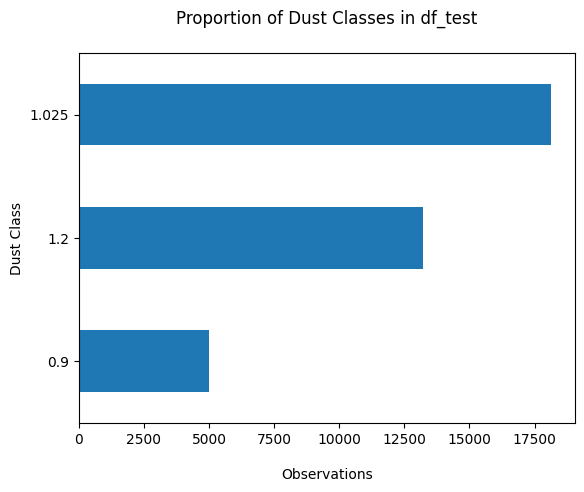

In [33]:
%matplotlib inline

category_totals = df_test.groupby('Dust')['Differential_pressure'].count().sort_values()
category_totals.plot(kind="barh", title='Proportion of Dust Classes in df_test\n', xlabel='\nObservations', ylabel='Dust Class')
category_totals

#### Our next aim is to 
* Fill these bins with data that best represents a central tendency.
* Make the size of each bin around ±**6100** observations (similar to the A4 Coarse Dust class bin) 

#### Procedure
* Include a comparison to how far each `differential_pressure` measure **deviates** or how far it is from the **.median()** value of the bin.
* Ordered by `filter_balance` showing sets with data closest to 600 Pa `differential_pressure`.
* Include comparison to median
* Add a cumulative measure of Data_No's to use as a ranking
* Create a dataframe of the A3 Medium Dust : **1.025**

Add a calculation of Standard Deviation to **df_test** test set and hide several colums for easier viewing

In [34]:
std_group = df_test.groupby('Data_No').std()
std_group.index.name = None
std_group.loc[:,'Data_No'] = std_group.index

map_std = df_test['Data_No'].map(std_group.set_index('Data_No')['Differential_pressure'])
df_test.loc[:,'std_DP'] = map_std
df_test.loc[30103:30108].style.hide(['Time', 'Dust_feed', 'Flow_rate', 'Dust', 'mass_g', 'cumulative_mass_g', 'Tt'], axis="columns")

Add a calculation of Coefficient of Variation (variance) to **df_test** test set

In [35]:
import numpy as np

cv = lambda data: np.std(data, ddof=1) / np.mean(data, axis=0) * 100
var_group = df_test.groupby('Data_No').apply(cv)
var_group.index.name = None
var_group.loc[:,'Data_No'] = var_group.index

map_var = df_test['Data_No'].map(var_group.set_index('Data_No')['Differential_pressure'])
df_test.loc[:,'cv_DP'] = map_var
df_test.loc[630:635]

/tmp/ipykernel_3166/2533562564.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  var_group.loc[:,'Data_No'] = var_group.index


Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
630       52              81.922740   80.952971  4.393868  55.693045  28.0   
631       52              80.656830   80.834515  4.392404  55.583759  28.1   
632       52              83.821610   82.029353  4.407077  55.673179  28.2   
633       53               1.898872    1.332466  0.287031  55.099079   1.2   
634       53               3.164786    2.065394  0.725321  55.633432   1.3   
635       53               3.164786    2.505151  0.918349  55.305573   1.4   

      Dust_feed   Dust   RUL  change_DP  change_EWM   mass_g  \
630  236.428943  1.025  46.3   0.000000    0.646513  0.24234   
631  236.428943  1.025  46.2  -1.265910   -0.118456  0.24234   
632  236.428943  1.025  46.1   3.164780    1.194838  0.24234   
633  316.985065  1.025  58.8   0.000000    0.377604  0.32491   
634  316.985065  1.025  58.7   1.265914    0.732928  0.32491   
635  316.985065  1.025  58.6   0.000000    0.439757  0.32491   

     cumulative_mass_g    Tt  filter_balance      std_DP       cv_DP  
630          67.855107  28.2           86.35   22.369204   87.353638  
631          68.097446  28.2           86.56   22.369204   87.353638  
632          68.339786  28.2           86.03   22.369204   87.353638  
633           3.898916  56.4           99.68  150.160712  115.251380  
634           4.223826  56.4           99.47  150.160712  115.251380  
635           4.548736  56.4           99.47  150.160712  115.251380

The coefficient of variation is an indication of how far the standard deviation is away from the mean. As we can see it does not add value to our understanding of the data, primarily due the the skewed nature of the `differential_pressure` continuous variable. 
* This re-enforces the understanding that descriptive statistics using the mean may not be preferred measure of central tendency.

**Remove Coefficient of Variation and Add Median to df_test**
* Median is the preferred measure of central tendency to observe in a skewed dataset such as this as it is not as affected by larger values.

In [36]:

del df_test['cv_DP']

median_group = df_test.groupby('Data_No').median()
median_group.index.name = None
median_group.loc[:,'Data_No'] = median_group.index

map_median = df_test['Data_No'].map(median_group.set_index('Data_No')['Differential_pressure'])
df_test.loc[:,'median_DP'] = map_median
df_test.loc[631:635].head().style.hide(['Time', 'Dust_feed', 'Flow_rate', 'Dust', 'mass_g', 'cumulative_mass_g', 'Tt'], axis="columns")

#### Now we can evaluate the dataframe with just **A3 Dust** in it, ordered by `filter_balance` as a measure of time to filter failure

Map the size of each bin and include a cumulative sum of each **bin size** to help see which data bin that reaches **6100** or more total values.

In [37]:
bin_sum = df_test.groupby('Data_No')['Data_No'].count().reset_index(name='bin_tot')
map_bin = df_test['Data_No'].map(bin_sum.set_index('Data_No')['bin_tot'])
df_test.loc[:, 'bin_size'] = map_bin

dust_A3 = df_test[df_test['Dust'] == 1.025]
filter_A3 = dust_A3[dust_A3.Data_No != dust_A3.Data_No.shift(-1)]
df_test_A3 = filter_A3.sort_values(by='filter_balance', ascending=True)

df_test_A3['c_sum'] = df_test_A3['bin_size'].cumsum()
dn_fb = df_test_A3.loc[:, 'Data_No'].head(14).sort_values(ascending=True).reset_index(drop=True)
df_test_A3.head(14).style.hide(['Time', 'Dust_feed', 'Flow_rate', 'Dust', 'mass_g', 'cumulative_mass_g', 'Tt'], axis="columns")

We can see that in the current dataframe containing only A3 Medium Dust observations, that is ordered by those tests with closest to a completed test to failure:
* **The top 3 data bins (seen at bin 68) would extract a A3 Medium dust training dataset with 5,613 observations**
* We will now perform a PDA to evaluate the suitability of these further

#### Rank by Standard Deviations, ordered by `std_DP`
The standard deviation is used to measure the spread of values in a sample.

In [38]:
df_test_A3_std = filter_A3.sort_values(by='std_DP', ascending=True)
df_test_A3_std['c_sum'] = df_test_A3_std['bin_size'].cumsum()
dn_sdv = df_test_A3_std.loc[:, 'Data_No'].head(14).sort_values(ascending=True).reset_index(drop=True)
df_test_A3_std.head(14).style.hide(['Time', 'Dust_feed', 'Flow_rate', 'Dust', 'mass_g', 'cumulative_mass_g', 'Tt'], axis="columns")

#### Rank by central tenancy of the Median value, ordered by `median_DP`
* Median = the value of the number in the middle of the dataset

In [39]:
df_test_A3_median = filter_A3.sort_values(by='median_DP', ascending=False)
df_test_A3_median['c_sum'] = df_test_A3_median['bin_size'].cumsum()
dn_mdp = df_test_A3_median.loc[:, 'Data_No'].head(14).sort_values(ascending=True).reset_index(drop=True)
df_test_A3_median.head(14).style.hide(['Time', 'Dust_feed', 'Flow_rate', 'Dust', 'mass_g', 'cumulative_mass_g', 'Tt'], axis="columns")

Review of the **data bin numbers** across descriptors of central tendency that would capture **6100** or more total values:

In [40]:
dn_review = pd.DataFrame()
dn_review.insert(loc=0, column='by_std_DP', value=dn_sdv)
dn_review.insert(loc=0, column='by_median_DP', value=dn_mdp)
dn_review.insert(loc=0, column='by_filter_balance', value=dn_fb)
dn_review

by_filter_balance  by_median_DP  by_std_DP
0                  51            53         51
1                  53            54         52
2                  54            55         56
3                  55            57         57
4                  56            58         59
5                  58            59         60
6                  59            60         62
7                  61            61         63
8                  62            62         65
9                  64            64         66
10                 67            67         72
11                 68            68         74
12                 73            73         75
13                 77            77         76

#### Considerations

* We can see that when we filter by **filter balance** or **median differential pressure** that most bin numbers are contained in both. In fact only bins 60, 54, and 53 are not contained in both, se we can consider these as the first to re-introduce to the data, perhaps when creating the validation set. 
    * This provides us with confidence that these test are higher value for our purposes and promote inclusion into our A3 Dust group.
* Reviewing those values with the lowest **Standard Deviation** inadvertently includes selects values furthest from fully completing a test (ie differential pressure reaching > 600 Pa). In such, these bins will not factor highly in our considerations to include in the dataset. 

---

## Feature Selection

* A **Selected Feature**: *The process of selecting a subset of relevant features (variables, predictors) for use in model construction*. 

Feature selection techniques are used for several reasons:

* Simplification of models to make them easier to interpret by researchers/users
* Shorter training times
* Avoiding too many input variables (dimensionality)
* Improve the data's compatibility with a learning model class
* Create symmetries in the input data.

The main idea when using a feature selection is that the data contains some features that are either **surplus**, **redundant** or **irrelevant** to the final business goal and can therefore be removed without incurring much loss of predictive power.

### Extracting bins from the **Testing** dataset

Make a separate frame indicating the bin numbers we wish to extract

In [41]:
bin_no = df_test_A3['Data_No'].head(3)
bin_no.to_frame()

Data_No
12705       67
4473        58
15267       68

Use these references to create a dataframe `df_train_cleaned_A3` that is ready for inclusion in our final dataframe `df_train_clean`.
* Note we disregard the cumulative sum measure as it doesn't add value to further calculations

In [42]:
df_test_copy = df_test
df_test_cleaned_A3 = df_test_copy[df_test_copy['Data_No'].isin(bin_no)]
df_test_cleaned_A3

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate   Time  \
3344        58               2.350984    1.200810  0.182996  57.723242    1.6   
3345        58               3.616898    2.167245  0.773457  57.734221    1.7   
3346        58               4.249856    3.000290  1.098709  58.217063    1.8   
3347        58               4.249856    3.500116  1.252796  58.030507    1.9   
3348        58               4.249856    3.800012  1.335004  58.118295    2.0   
...        ...                    ...         ...       ...        ...    ...   
15263       68             557.002300  555.693677  6.320217  82.134413  257.5   
15264       68             558.901200  556.976686  6.322523  82.650156  257.6   
15265       68             560.709700  558.469892  6.325201  81.770858  257.7   
15266       68             546.965400  553.868095  6.316927  81.804671  257.8   
15267       68             550.130200  552.372937  6.314223  81.179021  257.9   

        Dust_feed   Dust    RUL  change_DP  change_EWM    mass_g  \
3344   158.492533  1.025  120.2   1.265915    0.766783  0.162455   
3345   158.492533  1.025  120.1   1.265914    0.966435  0.162455   
3346   158.492533  1.025  120.0   0.632958    0.833044  0.162455   
3347   158.492533  1.025  119.9   0.000000    0.499827  0.162455   
3348   158.492533  1.025  119.8   0.000000    0.299896  0.162455   
...           ...    ...    ...        ...         ...       ...   
15263   59.107236  1.025    5.7   1.265900    0.872415  0.060585   
15264   59.107236  1.025    5.6   1.898900    1.283009  0.060585   
15265   59.107236  1.025    5.5   1.808500    1.493205  0.060585   
15266   59.107236  1.025    5.4 -13.744300   -4.601797  0.060585   
15267   59.107236  1.025    5.3   3.164800   -1.495158  0.060585   

       cumulative_mass_g     Tt  filter_balance      std_DP  median_DP  \
3344            2.599278  114.5           99.61  182.030488  129.84665   
3345            2.761732  114.5           99.40  182.030488  129.84665   
3346            2.924187  114.5           99.29  182.030488  129.84665   
3347            3.086642  114.5           99.29  182.030488  129.84665   
3348            3.249097  114.5           99.29  182.030488  129.84665   
...                  ...    ...             ...         ...        ...   
15263         156.006160  257.9            7.17  171.806322  104.70920   
15264         156.066745  257.9            6.85  171.806322  104.70920   
15265         156.127330  257.9            6.55  171.806322  104.70920   
15266         156.187915  257.9            8.84  171.806322  104.70920   
15267         156.248500  257.9            8.31  171.806322  104.70920   

       bin_size  
3344       1130  
3345       1130  
3346       1130  
3347       1130  
3348       1130  
...         ...  
15263      2562  
15264      2562  
15265      2562  
15266      2562  
15267      2562  

[5613 rows x 18 columns]

#### A Quick Review: 

In [43]:
print('Shape started with: ', dust_A3.shape)
print('Shape we have now: ', df_test_cleaned_A3.shape)

Shape started with:  (18139, 18)
Shape we have now:  (5613, 18)


Add these to a new dataset to compare

In [44]:
dust_A2 = df_test[df_test['Dust'] == 0.900]
dust_A3 = df_test_cleaned_A3
dust_A4 = df_test[df_test['Dust'] == 1.200]

df_test_compare = pd.concat([dust_A2, dust_A3, dust_A4], ignore_index = True)
df_test_compare

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
0           69               2.983941    1.193576  0.176954  80.390631   0.8   
1           69               6.691262    3.392651  1.221612  80.743068   0.9   
2           69               8.318866    5.363137  1.679549  80.485188   1.0   
3           69               9.132668    6.870949  1.927302  80.674289   1.1   
4           69              11.664500    8.788370  2.173429  81.128291   1.2   
...        ...                    ...         ...       ...        ...   ...   
23831      100             465.494800  457.888170  6.126625  82.675521  52.0   
23832      100             464.228900  460.424462  6.132149  82.421873  52.1   
23833      100             466.037300  462.669597  6.137013  82.743156  52.2   
23834      100             472.276500  466.512358  6.145285  82.785427  52.3   
23835      100             474.175400  469.577575  6.151834  83.013710  52.4   

        Dust_feed  Dust    RUL  change_DP  change_EWM    mass_g  \
0       59.107236   0.9  201.6   2.983941    1.193576  0.053197   
1       59.107236   0.9  201.5   3.707321    2.199074  0.053197   
2       59.107236   0.9  201.4   1.627604    1.970486  0.053197   
3       59.107236   0.9  201.3   0.813802    1.507812  0.053197   
4       59.107236   0.9  201.2   2.531832    1.917420  0.053197   
...           ...   ...    ...        ...         ...       ...   
23831  316.985065   1.2    8.2   6.329500    5.071087  0.380382   
23832  316.985065   1.2    8.1  -1.265900    2.536292  0.380382   
23833  316.985065   1.2    8.0   1.808400    2.245135  0.380382   
23834  316.985065   1.2    7.9   6.239200    3.842761  0.380382   
23835  316.985065   1.2    7.8   1.898900    3.065217  0.380382   

       cumulative_mass_g     Tt  filter_balance      std_DP  median_DP  \
0               0.425572  145.7           99.50   67.335775   69.08276   
1               0.478769  145.7           98.88   67.335775   69.08276   
2               0.531965  145.7           98.61   67.335775   69.08276   
3               0.585162  145.7           98.48   67.335775   69.08276   
4               0.638358  145.7           98.06   67.335775   69.08276   
...                  ...    ...             ...         ...        ...   
23831         197.798681   52.4           22.42  137.870465   90.42245   
23832         198.179063   52.4           22.63  137.870465   90.42245   
23833         198.559445   52.4           22.33  137.870465   90.42245   
23834         198.939827   52.4           21.29  137.870465   90.42245   
23835         199.320209   52.4           20.97  137.870465   90.42245   

       bin_size  
0          1450  
1          1450  
2          1450  
3          1450  
4          1450  
...         ...  
23831       435  
23832       435  
23833       435  
23834       435  
23835       435  

[23836 rows x 18 columns]

Dust
0.900     5015
1.025     5613
1.200    13208
Name: Differential_pressure, dtype: int64

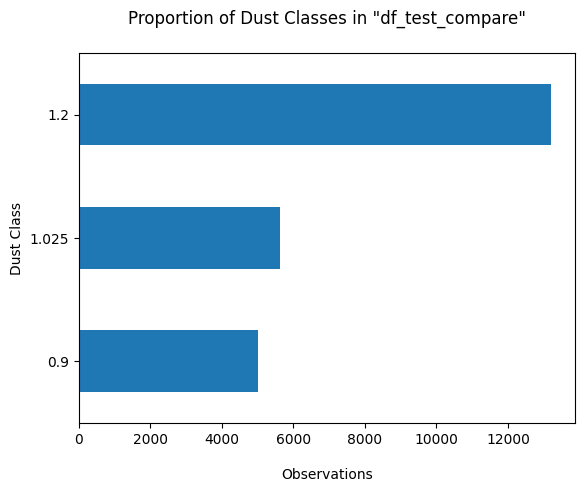

In [45]:
%matplotlib inline

category_totals = df_test_compare.groupby('Dust')['Differential_pressure'].count().sort_values()
category_totals.plot(kind="barh", title='Proportion of Dust Classes in "df_test_compare"\n', xlabel='\nObservations', ylabel='Dust Class')
category_totals

### Define function to perform the entire **dust consolidation procedure** for later use if we need

In [46]:
def consolidate_df_test_dust(df_test):
    """ Consolidates the test dataset into three even dust classes """
    # Calculating standard deviation
    std_group = df_test.groupby('Data_No')['Differential_pressure'].std()
    df_test['std_DP'] = df_test['Data_No'].map(std_group)

    # Calculating coefficient of variation
    var_group = df_test.groupby('Data_No')['Differential_pressure'].apply(lambda data: np.std(data, ddof=1) / np.mean(data, axis=0) * 100)
    df_test['cv_DP'] = df_test['Data_No'].map(var_group)

    # Calculating median
    median_group = df_test.groupby('Data_No')['Differential_pressure'].median()
    df_test['median_DP'] = df_test['Data_No'].map(median_group)

    # Get count of entries for each Data_No
    bin_sum = df_test.groupby('Data_No')['Data_No'].count()

    # Map the count of entries for each Data_No
    df_test['bin_size'] = df_test['Data_No'].map(bin_sum)

    # Filter rows with Dust
    dust_A3 = df_test[df_test['Dust'] == 1.025]
    dust_A4 = df_test[df_test['Dust'] == 1.200]

    # Select rows which are not the last ones
    filter_A3 = dust_A3[dust_A3.Data_No != dust_A3.Data_No.shift(-1)]
    filter_A4 = dust_A4[dust_A4.Data_No != dust_A4.Data_No.shift(-1)]

    # Sort values by filter_balance in ascending order
    df_test_A3 = filter_A3.sort_values(by='filter_balance', ascending=True)
    df_test_A4 = filter_A4.sort_values(by='filter_balance', ascending=True)

    # Compute cumulative sum
    df_test_A3['c_sum'] = df_test_A3['bin_size'].cumsum()
    df_test_A4['c_sum'] = df_test_A4['bin_size'].cumsum()

    bin_no = df_test_A3['Data_No'].head(3)
    dn_fb = df_test_A3.loc[df_test_A3['Data_No'].isin(bin_no), 'Data_No'].head(14).sort_values(ascending=True).reset_index(drop=True)
    df_test_cleaned_A3 = df_test[df_test['Data_No'].isin(bin_no)]
    df_test_cleaned_A3.head(14).style.hide(['Time', 'Dust_feed', 'Flow_rate', 'Dust', 'mass_g', 'cumulative_mass_g', 'Tt'], axis="columns")

    # Repeat fot A4 Coarse Dust
    bin_no = df_test_A4['Data_No'].head(4)
    bin_no.to_frame()

    # Get all values from df_test that are in bin_no
    df_test_copy = df_test
    df_test_cleaned_A4 = df_test_copy[df_test_copy['Data_No'].isin(bin_no)]

    # Create dataframes for each dust class
    dust_A2 = df_test[df_test['Dust'] == 0.900]
    dust_A3 = df_test_cleaned_A3
    dust_A4 = df_test_cleaned_A4

    # Concatenate the dataframes
    global df_test_even_dist
    df_test_even_dist = pd.concat([dust_A2, dust_A3, dust_A4], ignore_index = True)

    # Reset index to reduce noise of missing indicies
    df_test_even_dist = df_test_even_dist.reset_index(drop=True)

    # Plot a bar graph of the dust classes
    category_totals = df_test_even_dist.groupby('Dust')['Differential_pressure'].count().sort_values()
    plot = category_totals.plot(kind="barh", title='Proportion of Dust Classes in "df_test"\n', xlabel='\nObservations', ylabel='Dust Class')

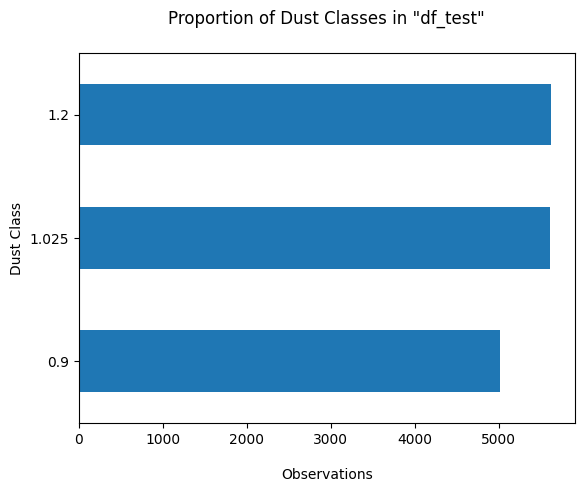

In [47]:
consolidate_df_test_dust(df_test)

### **How much data do we need**?
* At various bin sampling of A2 and A3 dust types, we currently have a little over 16,000 observations to train the ML Models
* Will review this depending on the performance of the models
* Overfitting with too much data vs underfitting with too little is a balance and the qualitative nature of the heuristics surrounding the predictions made
* Nonlinear Algorithms (like clustering) may need more data

Short answer is, **we have plenty of extra data at this point that may be less suited to training the model**. 

* Notwithstanding, it is still live data and may there may be some value toward increasing the power of our ML Models. 
* We also have the option to alter the selected number of dust class bins and possibly augmenting the smaller A4 dust dataset with the **Synthetic Minority Oversampling Technique (SMOTE)** or SMOTE NC for categorical data should we need.

We could run the supplied **train data** through the above process, however this set is missing the key target variable 'Remeining Useful Life'. We will consider the inclusion of data from the upper two bins should we encounter an issue with over/underfitting.

## Other Feature Selection Considerations

Popular filter metrics for **classification problems** are 
* **Correlation-based feature selection**
* Mutual information
* Class separability
    * Error probability
    * Inter-class distance
    * Probabilistic distance
    * Entropy
* **Consistency-based feature selection**
* **Correlation-based feature selection**

#### Correlation Based Feature Selection


In [48]:
df_test_even_dist

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
0           69               2.983941    1.193576  0.176954  80.390631   0.8   
1           69               6.691262    3.392651  1.221612  80.743068   0.9   
2           69               8.318866    5.363137  1.679549  80.485188   1.0   
3           69               9.132668    6.870949  1.927302  80.674289   1.1   
4           69              11.664500    8.788370  2.173429  81.128291   1.2   
...        ...                    ...         ...       ...        ...   ...   
16249      100             465.494800  457.888170  6.126625  82.675521  52.0   
16250      100             464.228900  460.424462  6.132149  82.421873  52.1   
16251      100             466.037300  462.669597  6.137013  82.743156  52.2   
16252      100             472.276500  466.512358  6.145285  82.785427  52.3   
16253      100             474.175400  469.577575  6.151834  83.013710  52.4   

        Dust_feed  Dust    RUL  change_DP  change_EWM    mass_g  \
0       59.107236   0.9  201.6   2.983941    1.193576  0.053197   
1       59.107236   0.9  201.5   3.707321    2.199074  0.053197   
2       59.107236   0.9  201.4   1.627604    1.970486  0.053197   
3       59.107236   0.9  201.3   0.813802    1.507812  0.053197   
4       59.107236   0.9  201.2   2.531832    1.917420  0.053197   
...           ...   ...    ...        ...         ...       ...   
16249  316.985065   1.2    8.2   6.329500    5.071087  0.380382   
16250  316.985065   1.2    8.1  -1.265900    2.536292  0.380382   
16251  316.985065   1.2    8.0   1.808400    2.245135  0.380382   
16252  316.985065   1.2    7.9   6.239200    3.842761  0.380382   
16253  316.985065   1.2    7.8   1.898900    3.065217  0.380382   

       cumulative_mass_g     Tt  filter_balance      std_DP  median_DP  \
0               0.425572  145.7           99.50   67.335775   69.08276   
1               0.478769  145.7           98.88   67.335775   69.08276   
2               0.531965  145.7           98.61   67.335775   69.08276   
3               0.585162  145.7           98.48   67.335775   69.08276   
4               0.638358  145.7           98.06   67.335775   69.08276   
...                  ...    ...             ...         ...        ...   
16249         197.798681   52.4           22.42  137.870465   90.42245   
16250         198.179063   52.4           22.63  137.870465   90.42245   
16251         198.559445   52.4           22.33  137.870465   90.42245   
16252         198.939827   52.4           21.29  137.870465   90.42245   
16253         199.320209   52.4           20.97  137.870465   90.42245   

       bin_size      cv_DP  
0          1450  74.612213  
1          1450  74.612213  
2          1450  74.612213  
3          1450  74.612213  
4          1450  74.612213  
...         ...        ...  
16249       435  95.682230  
16250       435  95.682230  
16251       435  95.682230  
16252       435  95.682230  
16253       435  95.682230  

[16254 rows x 19 columns]

Plot relevant relationships to **test** dataset (includes RUL)

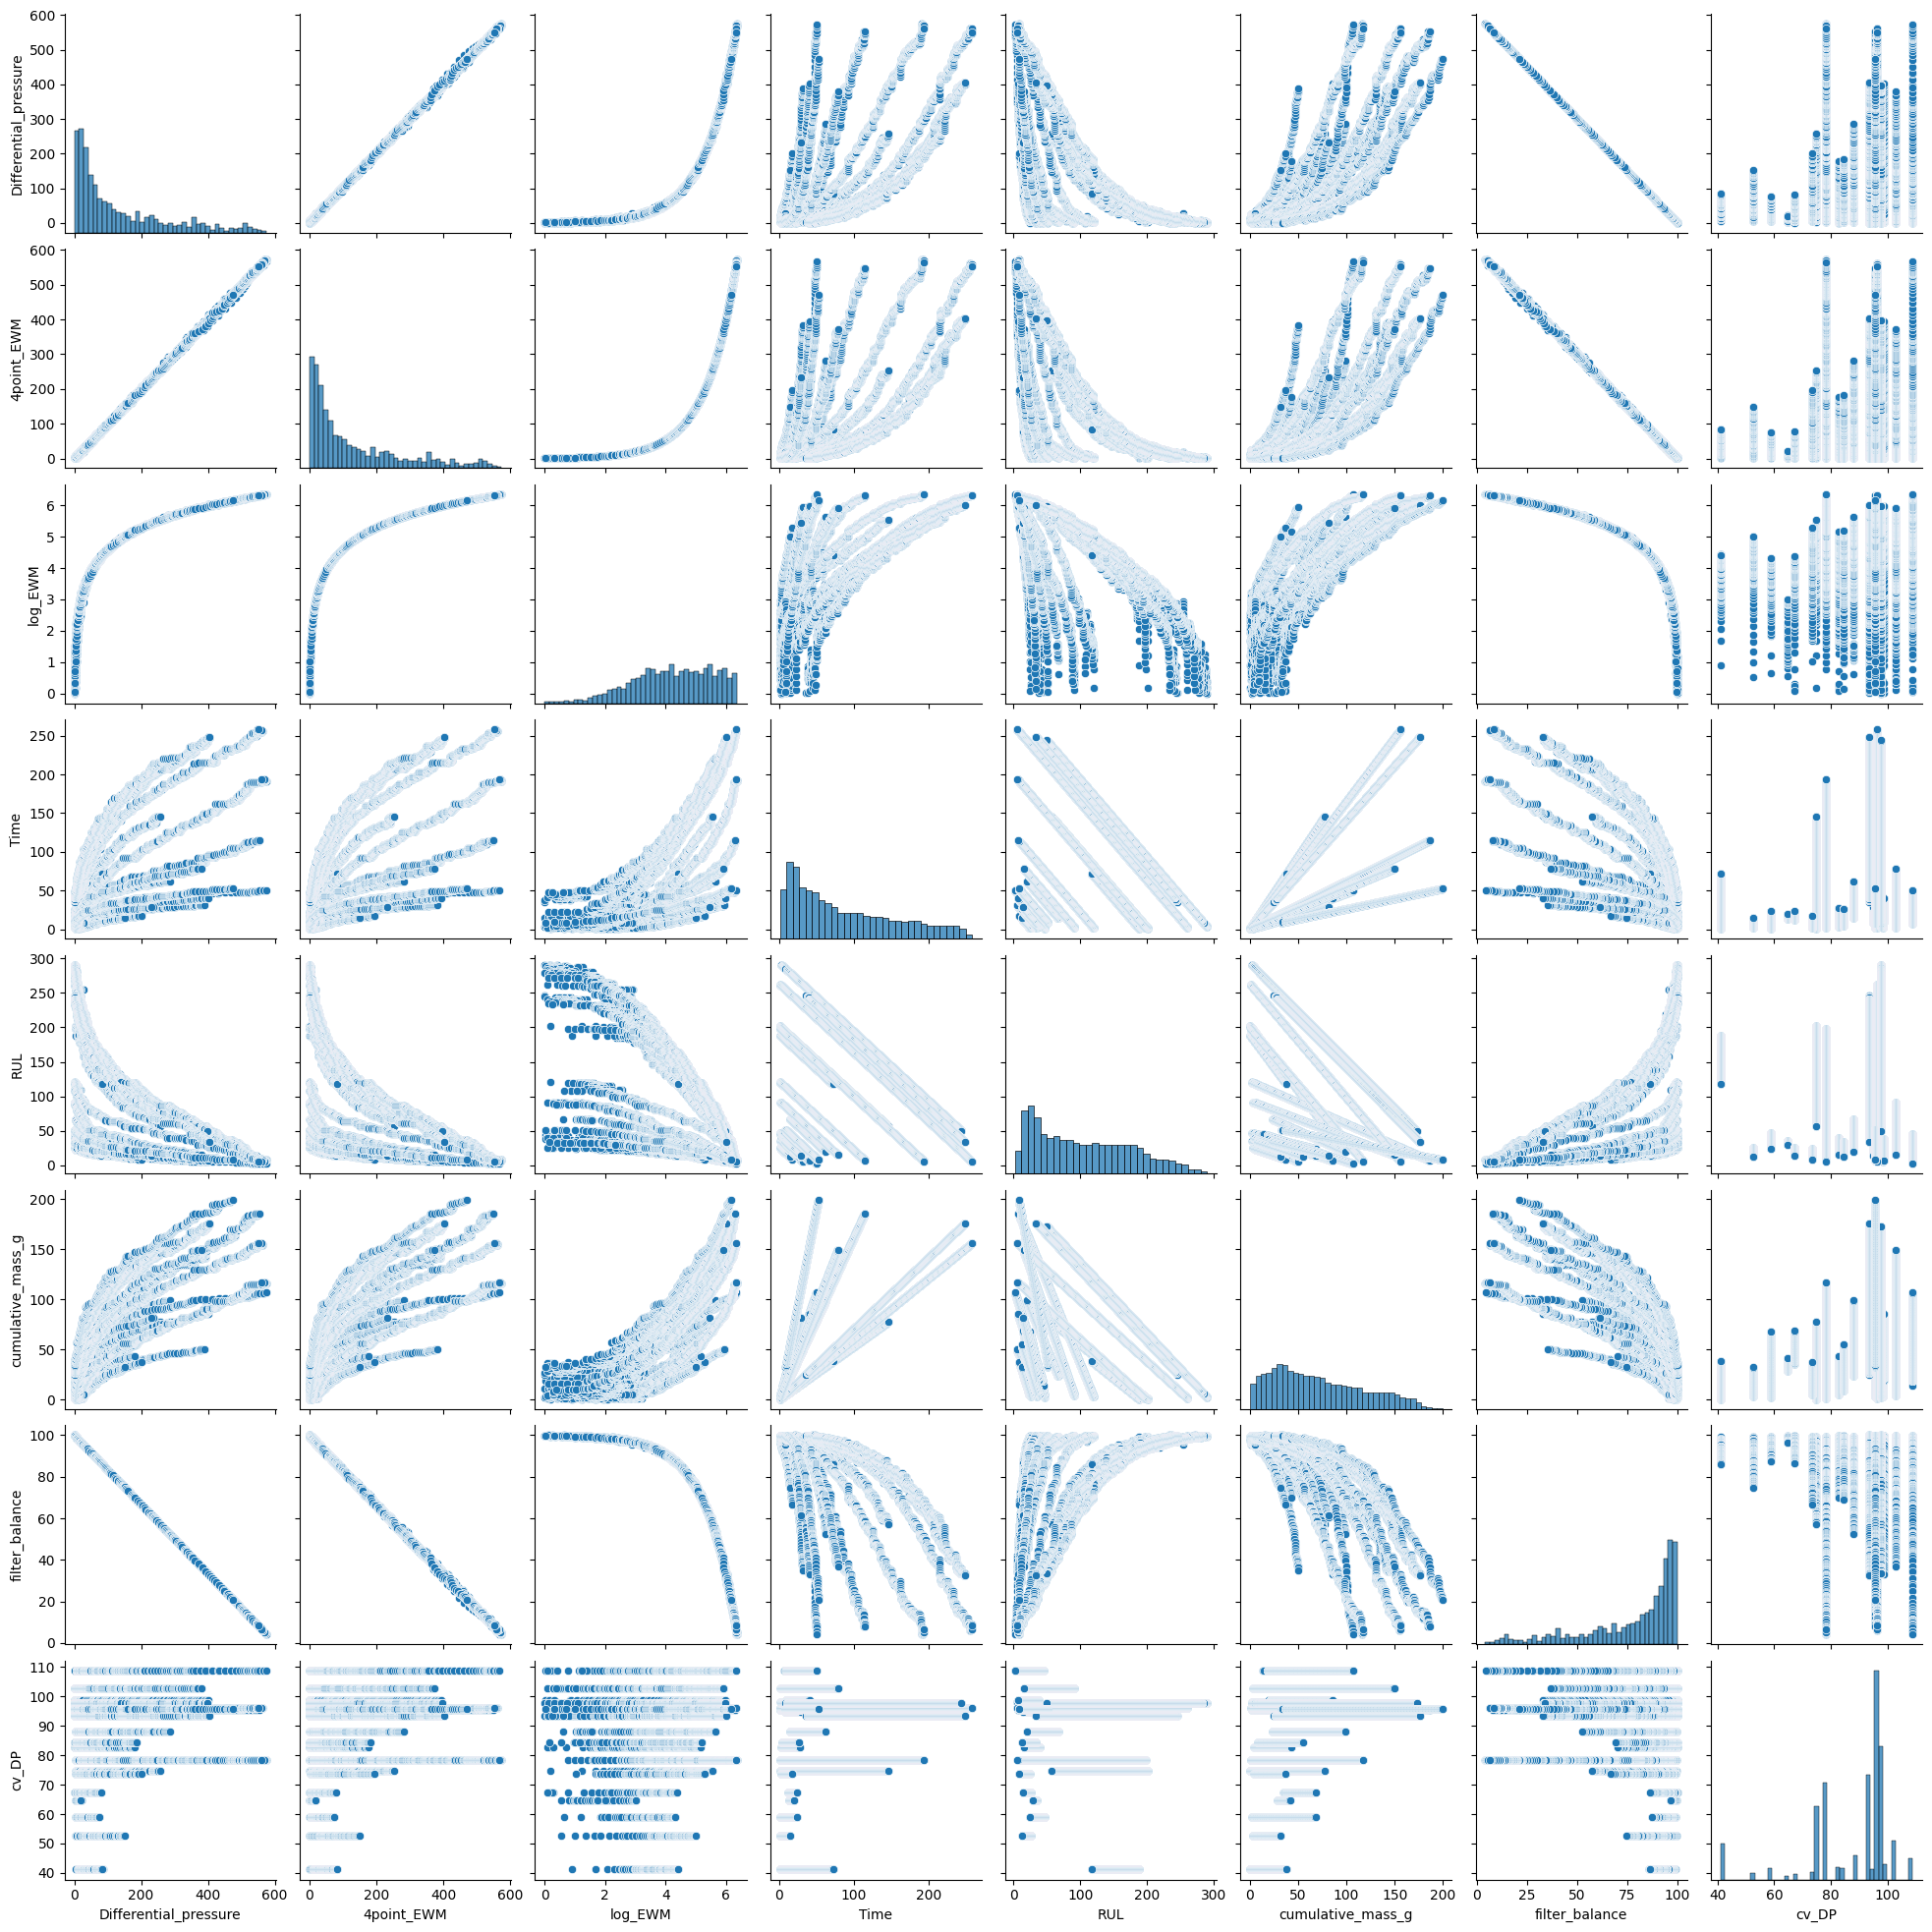

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df_test_corr = df_test_even_dist.drop(['Data_No', 'Flow_rate', 'Dust', 'mass_g', 'Dust_feed', 'Tt', 'bin_size', 'median_DP', 'std_DP', 'change_DP', 'change_EWM'], axis="columns")
sns.pairplot(data=df_test_corr)
plt.show() 

Plot relevant relationships to **train** dataset

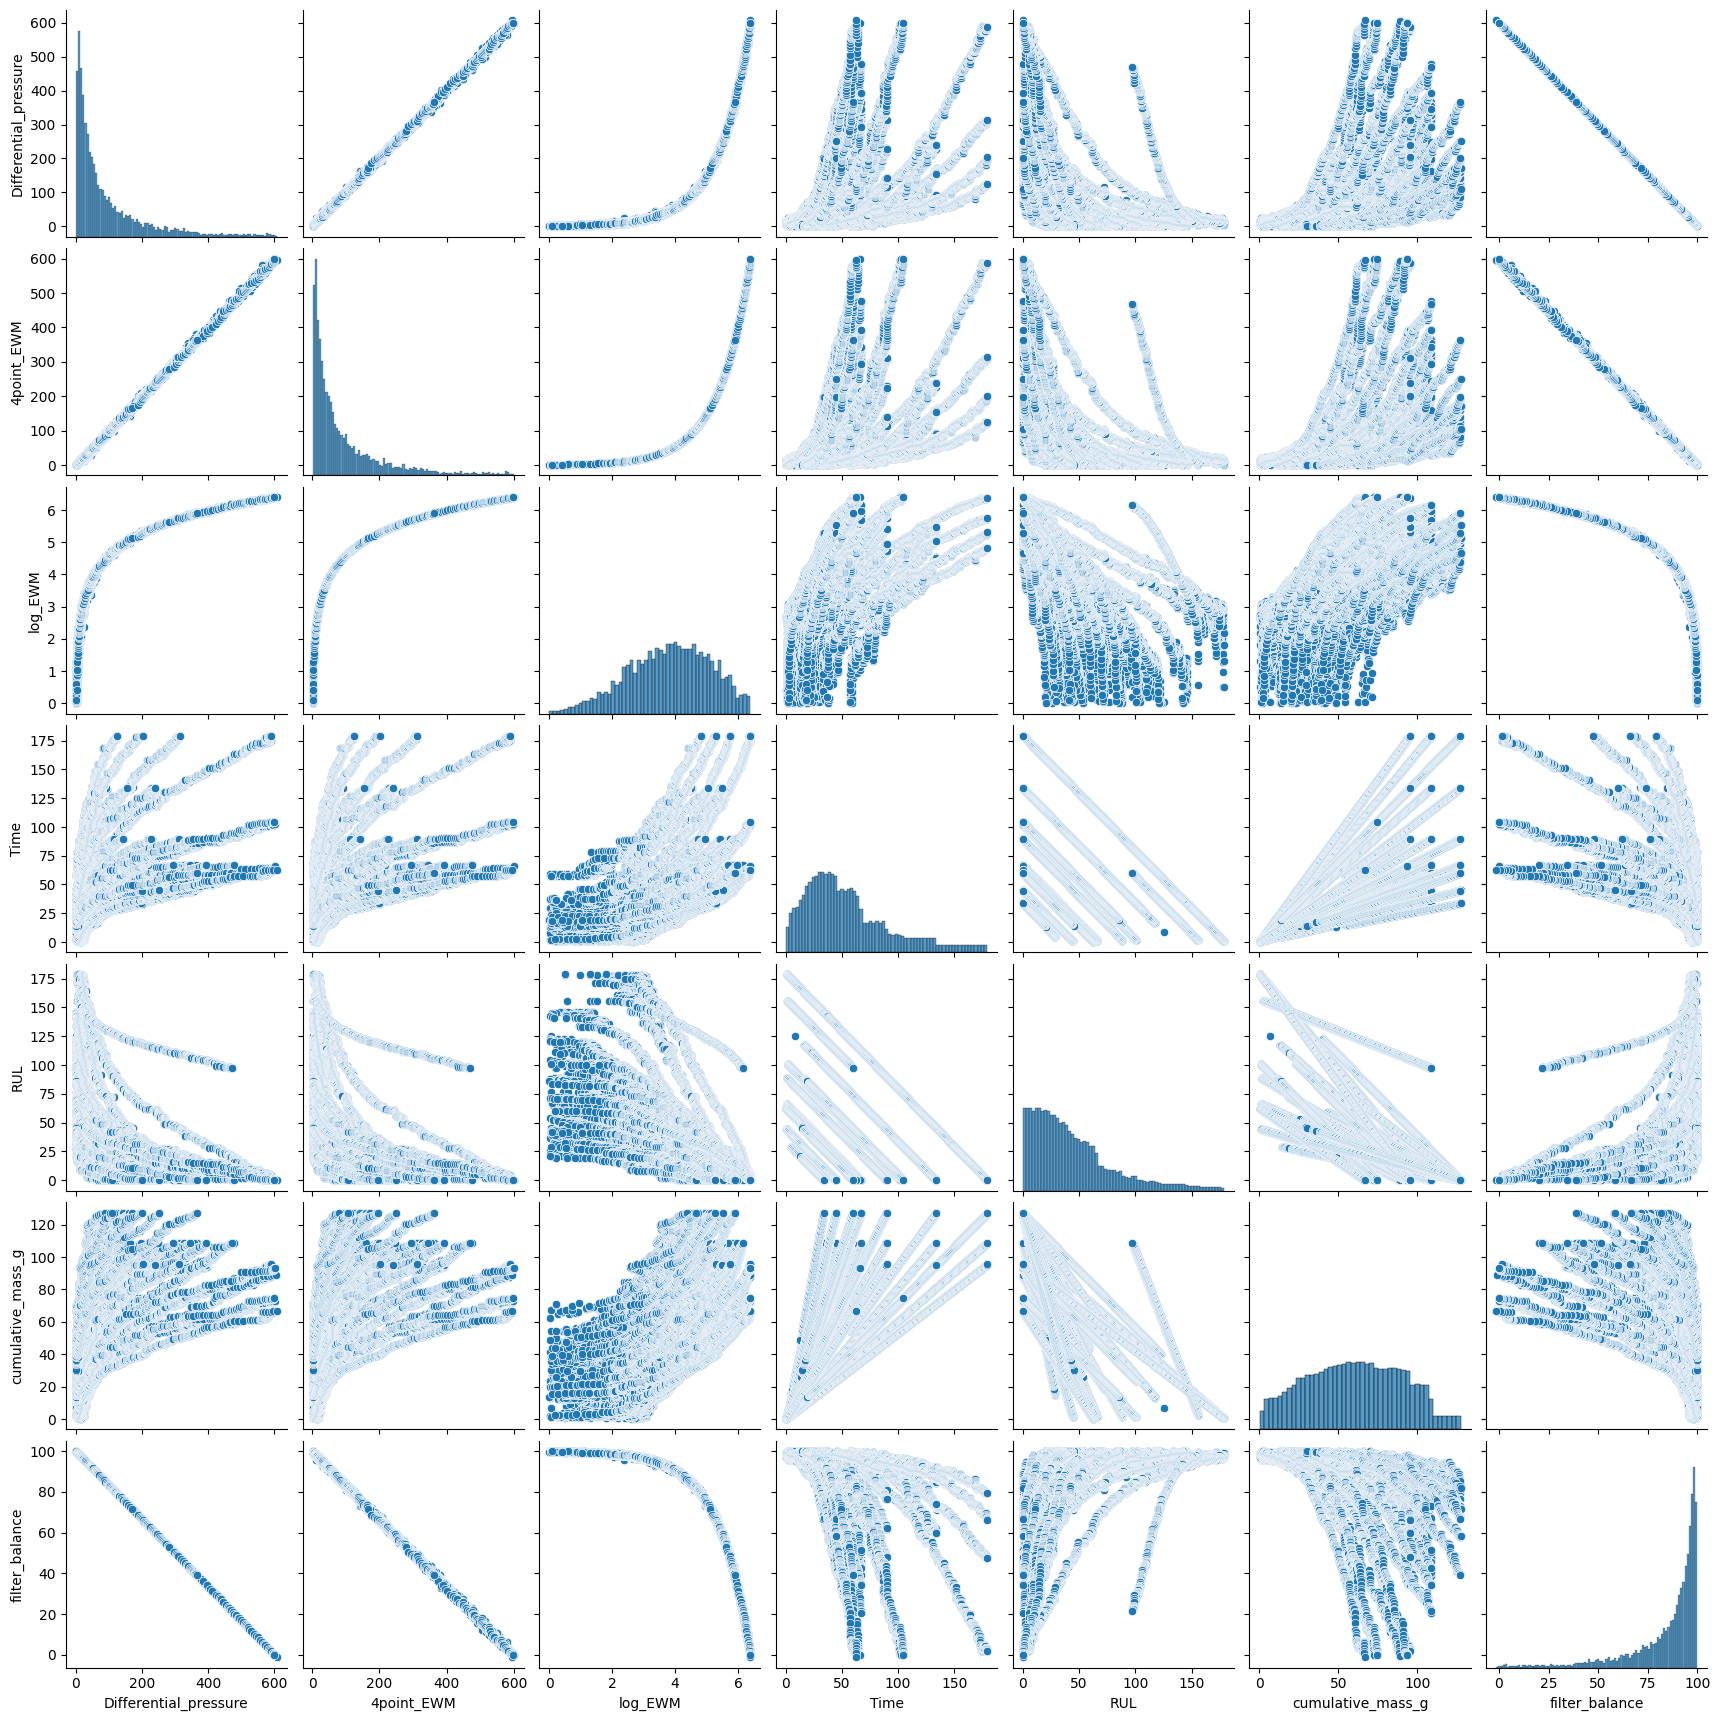

In [50]:
df_train_corr = df_train.drop(['Data_No', 'Flow_rate', 'Dust', 'mass_g', 'Dust_feed', 'Tt', 'change_DP', 'change_EWM'], axis="columns")
sns.pairplot(data=df_train_corr)
plt.show()

With a quick look, we notice the same relationships between `differential_pressure`, `RUL` and `Time`, with our engineered variables also indicating influence.

#### Heatmaps for **df_test** engineered dataset

Import ppscore function (Code Institute [Exploratory Data Analysis Tools](https://learn.codeinstitute.net/courses/course-v1:CodeInstitute+DDA101+2021_T4/courseware/468437859a944f7d81a34234957d825b/c8ea2343476c48739676b7f03ba9b08e/) 2022).

In [51]:
import numpy as np
import ppscore as pps

def heatmap_corr(df, threshold, figsize=(10, 8), font_annot=8):
    """
    Heatmap for pearson (linear) and spearman (monotonic) correlations to 
    visualize only those correlation levels greater than a given threshold.
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={'size': font_annot}, ax=axes,
                    linewidth=0.01, linecolor='WhiteSmoke'
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(10, 8), font_annot=8):
    """
    Heatmap for power predictive score
    PPS == 0 means that there is no predictive power
    PPS < 0.2 often means that there is some relevant predictive power but it is weak
    PPS > 0.2 often means that there is strong predictive power
    PPS > 0.8 often means that there is a deterministic relationship in the data,
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={'size': font_annot},
                         linewidth=0.01, linecolor='WhiteSmoke')
        plt.ylim(len(df.columns), 0)
        plt.show()


def calculate_corr_and_pps(df):
    """
    Calculate the correlations and ppscore of a given dataframe
    """
    df_corr_spearman = df.corr(method='spearman')
    df_corr_pearson = df.corr(method='pearson')

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query('ppscore < 1').filter(['ppscore']).describe().T
    print('PPS threshold - check PPS score IQR to decide threshold for heatmap \n')
    print(pps_score_stats.round(4))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def display_corr_and_pps(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(10, 8), font_annot=8):
    """
    Render the correlations and ppscore heatmaps for a given dataframe
    """
    # print('\n')
    print('To analyze: \n** Colinearity: how the target variable is correlated with the other features (variables)')
    print('** Multi-colinearity: how each feature correlates among themselves (multi-colinearity)')

    print('\n')
    print('*** Heatmap: Pearson Correlation ***')
    print(f'It evaluates the linear relationship between two continuous variables \n'
          f'* A +ve correlation indicates that as one variable increases the other variable tends to increase.\n'
          f'A correlation near zero indicates that as one variable increases, there is no tendency in the other variable to either increase or decrease.\n'
          f'A -ve correlation indicates that as one variable increases the other variable tends to decrease.')
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print('\n')
    print(f'*** Heatmap: Spearman Correlation ***')
    print(f'It evaluates monotonic relationship \n'
          f'Spearman correlation coefficients range from -1 to +1.\n'
          f'The sign of the coefficient indicates whether it is a positive or negative monotonic relationship.\n'
          f'* A positive correlation means that as one variable increases, the other variable also tends to increase.')
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print('\n')
    print('*** Heatmap: Power Predictive Score (PPS) ***')
    print(f'PPS detects linear or non-linear relationships between two columns.\n'
          f'The variable on the x-axis is used to predict the corresponding variable on the y-axis.\n'
          f'The score ranges from 0 (no predictive power) to 1 (perfect predictive power)\n\n'
          f'* PPS == 0 means that there is no predictive power\n'
          f'* PPS < 0.2 often means that there is some relevant predictive power but it is weak\n'
          f'* PPS > 0.2 often means that there is strong predictive power\n'
          f'* PPS > 0.8 often means that there is a deterministic relationship in the data\n')
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [52]:
df_drop = df_test_even_dist.drop(['Data_No', 'Flow_rate', 'Dust', 'mass_g', 'RUL', 'bin_size', 'median_DP', 'std_DP', 'change_DP', 'change_EWM'], axis="columns")
df_corr_pearson, df_corr_spearman, pps_matrix = calculate_corr_and_pps(df_drop)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean     std  min  25%     50%     75%  max
ppscore   72.0  0.325  0.3844  0.0  0.0  0.1736  0.4862  1.0


To analyze: 
** Colinearity: how the target variable is correlated with the other features (variables)
** Multi-colinearity: how each feature correlates among themselves (multi-colinearity)


*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 
* A +ve correlation indicates that as one variable increases the other variable tends to increase.
A correlation near zero indicates that as one variable increases, there is no tendency in the other variable to either increase or decrease.
A -ve correlation indicates that as one variable increases the other variable tends to decrease.


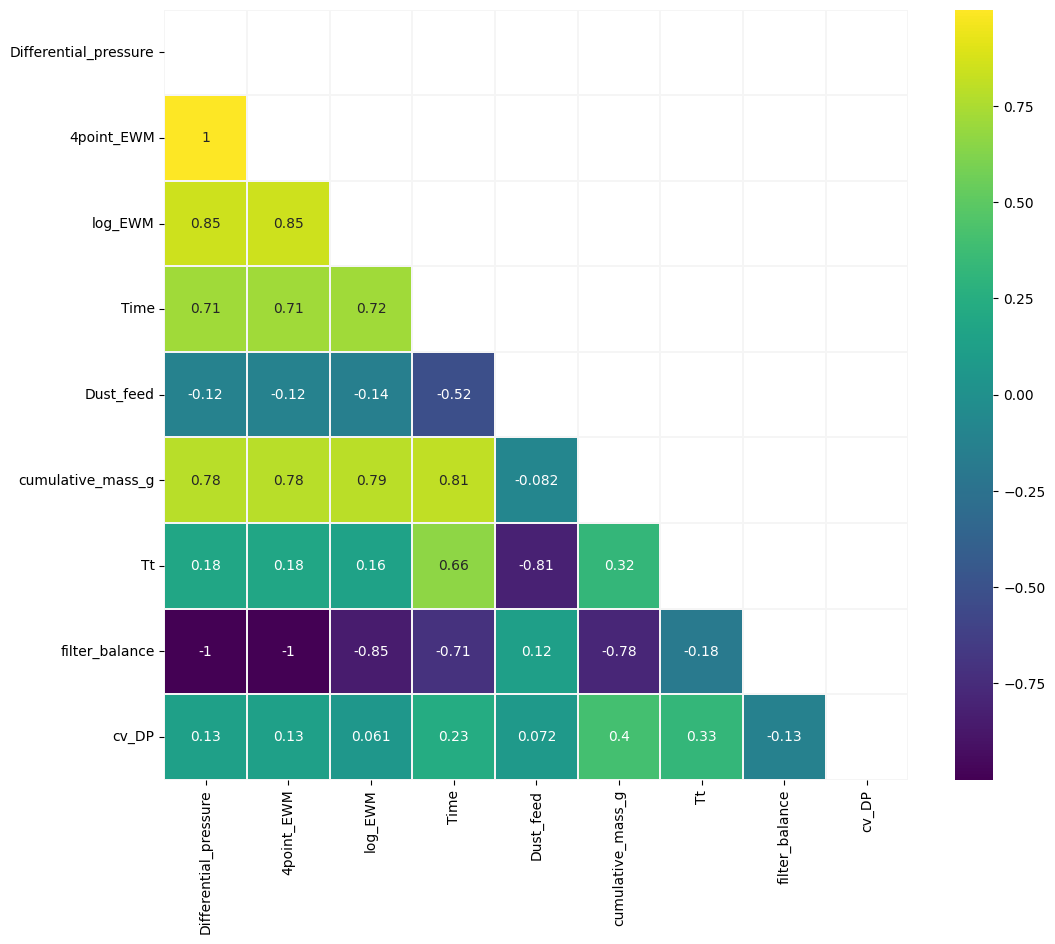



*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 
Spearman correlation coefficients range from -1 to +1.
The sign of the coefficient indicates whether it is a positive or negative monotonic relationship.
* A positive correlation means that as one variable increases, the other variable also tends to increase.


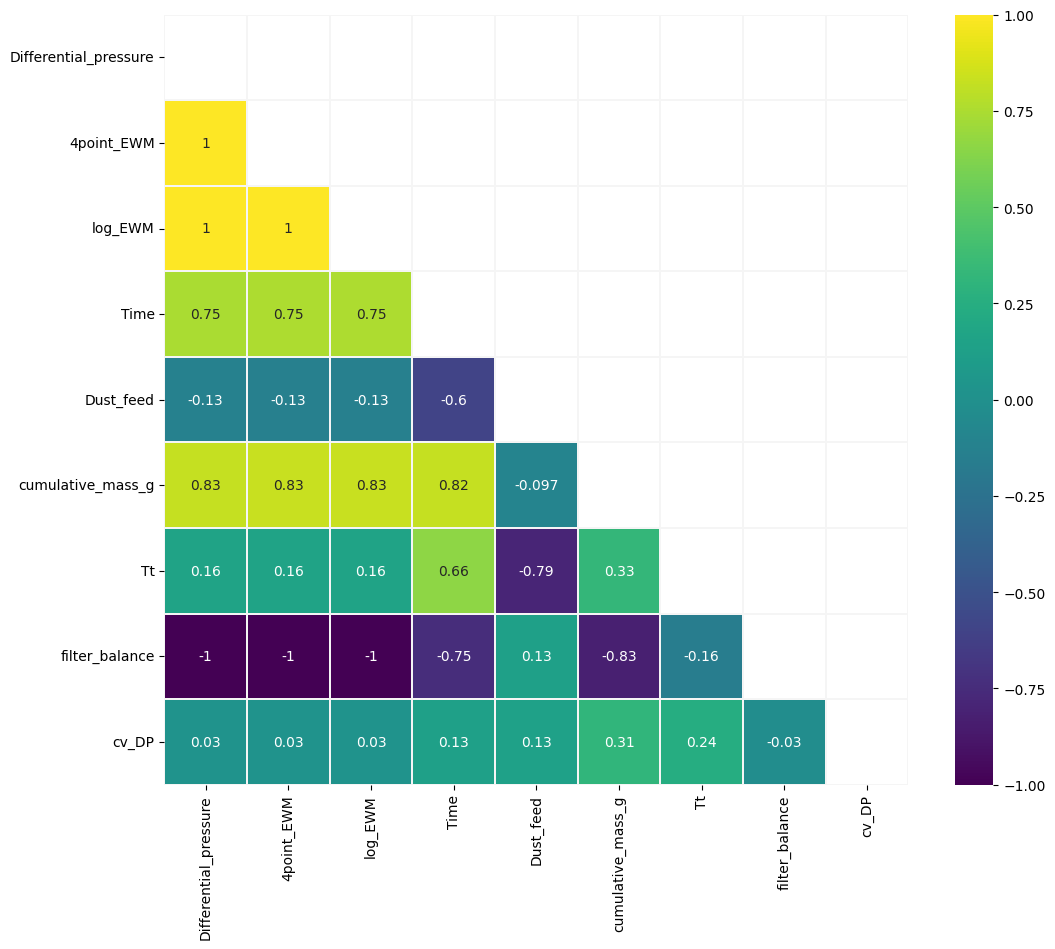



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The variable on the x-axis is used to predict the corresponding variable on the y-axis.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power)

* PPS == 0 means that there is no predictive power
* PPS < 0.2 often means that there is some relevant predictive power but it is weak
* PPS > 0.2 often means that there is strong predictive power
* PPS > 0.8 often means that there is a deterministic relationship in the data



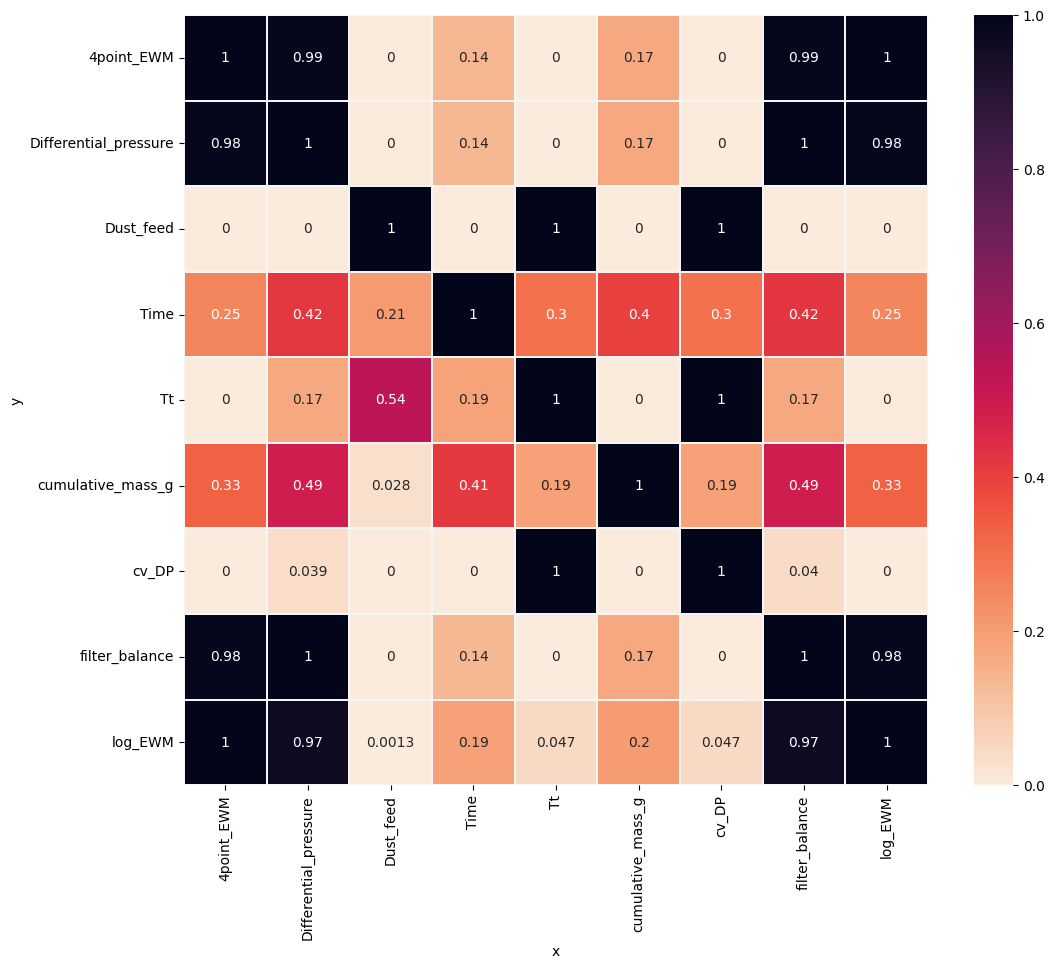

In [53]:
display_corr_and_pps(df_corr_pearson = df_corr_pearson, df_corr_spearman = df_corr_spearman,
                    pps_matrix = pps_matrix, CorrThreshold = 0, PPS_Threshold =0,
                    figsize=(12,10), font_annot=10
                    )

### Observations
Maintaining the observations we have previously made at 02_DataCleaning notebook, we also note:

* As we would think, there is a strong linear relationship between **Exponential Weighted Mean** (4pointEWM) with **Differential Pressure** (DP) and **Filter Baalance**, indicating that we can confidently consider 4pointEWM (and its log value) as a proxy for DP.
* **Cumulative mass** and **time** have a mildly positive relationship to Differential Pressure values.
* **Dust Feed** also has a mildly positive relationship to **Total Time** values.

## **SmartCorrelatedSelection** of Variables

[Feature Engine](https://pypi.org/project/feature-engine/) is a python library with multiple transformers to engineer and select features for use in machine learning models. Applied here to confirm our conclusions, it looks for groups of features that correlate amongst themselves and removes any surplus correlated features since they add the same information to the model. 

The transformer finds the groups and drops the features based on the **method**, **threshold** and **selection** method we choose. For every group of correlated features, the transformer will remove all but one feature.

* Step 1: Create a separate DataFrame, with the variable(s)

In [54]:
df_engineering = df_total.copy().drop(['change_DP', 'change_EWM'], axis="columns")
df_engineering.head()

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
54        1               1.537182    1.046296  0.045257  54.143527   5.5   
55        1               1.537182    1.242651  0.217247  54.518255   5.6   
56        1               1.537182    1.360463  0.307825  54.658781   5.7   
57        1               3.345631    2.154530  0.767573  54.780562   5.8   
58        1               5.244502    3.390519  1.220983  54.574466   5.9   

     Dust_feed   Dust   RUL   mass_g  cumulative_mass_g    Tt  filter_balance  
54  236.428943  1.025  39.4  0.24234          13.328682  44.9           99.74  
55  236.428943  1.025  39.3  0.24234          13.571021  44.9           99.74  
56  236.428943  1.025  39.2  0.24234          13.813361  44.9           99.74  
57  236.428943  1.025  39.1  0.24234          14.055701  44.9           99.44  
58  236.428943  1.025  39.0  0.24234          14.298040  44.9           99.13

* Step 2: Create engineered variables(s) applying the transformation(s)

In [55]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")

corr_sel.fit_transform(df_engineering)
print('Correlated Variables :\n', corr_sel.correlated_feature_sets_)
print('\nFeatures to Drop :\n', corr_sel.features_to_drop_)

Correlated Variables :
 [{'cumulative_mass_g', '4point_EWM', 'Time', 'Differential_pressure', 'filter_balance', 'log_EWM'}, {'RUL', 'mass_g', 'Tt', 'Dust_feed'}]

Features to Drop :
 ['4point_EWM', 'log_EWM', 'Time', 'RUL', 'mass_g', 'cumulative_mass_g', 'Tt', 'filter_balance']


On running the transformer, it found 2 groups of correlated features:

> 1. [cumulative_mass_g', 'log_EWM', 'Time', 'Differential_pressure', 'filter_balance', '4point_EWM']

> 2. ['RUL', 'mass_g', 'Tt', 'Dust_feed']

* It decided `Differential_pressure` was the most relevant feature to keep in **group 1**.
* It decided `Dust_feed` was the most relevant feature to keep in **group 2**.

### Observations
* Confirmed **Differential Pressure** as a primary feature in both **train** & **test** datasets
* Confirmed **Dust_feed** as a primary feature in the **test** dataset.
* We will ensure to include these features to each ML Pipeline at first.

In [56]:
df_total

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
54           1               1.537182    1.046296  0.045257  54.143527   5.5   
55           1               1.537182    1.242651  0.217247  54.518255   5.6   
56           1               1.537182    1.360463  0.307825  54.658781   5.7   
57           1               3.345631    2.154530  0.767573  54.780562   5.8   
58           1               5.244502    3.390519  1.220983  54.574466   5.9   
...        ...                    ...         ...       ...        ...   ...   
78829      100             465.494800  457.888170  6.126625  82.675521  52.0   
78830      100             464.228900  460.424462  6.132149  82.421873  52.1   
78831      100             466.037300  462.669597  6.137013  82.743156  52.2   
78832      100             472.276500  466.512358  6.145285  82.785427  52.3   
78833      100             474.175400  469.577575  6.151834  83.013710  52.4   

        Dust_feed   Dust   RUL  change_DP  change_EWM    mass_g  \
54     236.428943  1.025  39.4   0.000000    0.327257  0.242340   
55     236.428943  1.025  39.3   0.000000    0.196354  0.242340   
56     236.428943  1.025  39.2   0.000000    0.117813  0.242340   
57     236.428943  1.025  39.1   1.808449    0.794067  0.242340   
58     236.428943  1.025  39.0   1.898871    1.235989  0.242340   
...           ...    ...   ...        ...         ...       ...   
78829  316.985065  1.200   8.2   6.329500    5.071087  0.380382   
78830  316.985065  1.200   8.1  -1.265900    2.536292  0.380382   
78831  316.985065  1.200   8.0   1.808400    2.245135  0.380382   
78832  316.985065  1.200   7.9   6.239200    3.842761  0.380382   
78833  316.985065  1.200   7.8   1.898900    3.065217  0.380382   

       cumulative_mass_g    Tt  filter_balance  
54             13.328682  44.9           99.74  
55             13.571021  44.9           99.74  
56             13.813361  44.9           99.74  
57             14.055701  44.9           99.44  
58             14.298040  44.9           99.13  
...                  ...   ...             ...  
78829         197.798681  52.4           22.42  
78830         198.179063  52.4           22.63  
78831         198.559445  52.4           22.33  
78832         198.939827  52.4           21.29  
78833         199.320209  52.4           20.97  

[69686 rows x 15 columns]

---

## Save Datasets

Save the files to /transformed folder

In [57]:
import os
try:
  os.makedirs(name='outputs/datasets/transformed')
except Exception as e:
  print(e)

df_total.to_csv(f'outputs/datasets/transformed/dfTransformedTotal.csv',index=False)
df_test_even_dist.to_csv(f'outputs/datasets/transformed/dfTransformedTest.csv',index=False)

In [58]:
df_total

Data_No  Differential_pressure  4point_EWM   log_EWM  Flow_rate  Time  \
54           1               1.537182    1.046296  0.045257  54.143527   5.5   
55           1               1.537182    1.242651  0.217247  54.518255   5.6   
56           1               1.537182    1.360463  0.307825  54.658781   5.7   
57           1               3.345631    2.154530  0.767573  54.780562   5.8   
58           1               5.244502    3.390519  1.220983  54.574466   5.9   
...        ...                    ...         ...       ...        ...   ...   
78829      100             465.494800  457.888170  6.126625  82.675521  52.0   
78830      100             464.228900  460.424462  6.132149  82.421873  52.1   
78831      100             466.037300  462.669597  6.137013  82.743156  52.2   
78832      100             472.276500  466.512358  6.145285  82.785427  52.3   
78833      100             474.175400  469.577575  6.151834  83.013710  52.4   

        Dust_feed   Dust   RUL  change_DP  change_EWM    mass_g  \
54     236.428943  1.025  39.4   0.000000    0.327257  0.242340   
55     236.428943  1.025  39.3   0.000000    0.196354  0.242340   
56     236.428943  1.025  39.2   0.000000    0.117813  0.242340   
57     236.428943  1.025  39.1   1.808449    0.794067  0.242340   
58     236.428943  1.025  39.0   1.898871    1.235989  0.242340   
...           ...    ...   ...        ...         ...       ...   
78829  316.985065  1.200   8.2   6.329500    5.071087  0.380382   
78830  316.985065  1.200   8.1  -1.265900    2.536292  0.380382   
78831  316.985065  1.200   8.0   1.808400    2.245135  0.380382   
78832  316.985065  1.200   7.9   6.239200    3.842761  0.380382   
78833  316.985065  1.200   7.8   1.898900    3.065217  0.380382   

       cumulative_mass_g    Tt  filter_balance  
54             13.328682  44.9           99.74  
55             13.571021  44.9           99.74  
56             13.813361  44.9           99.74  
57             14.055701  44.9           99.44  
58             14.298040  44.9           99.13  
...                  ...   ...             ...  
78829         197.798681  52.4           22.42  
78830         198.179063  52.4           22.63  
78831         198.559445  52.4           22.33  
78832         198.939827  52.4           21.29  
78833         199.320209  52.4           20.97  

[69686 rows x 15 columns]

---

# Conclusions and Next steps

#### Conclusions: 
* Data has been cleaned and engineered with a variety of methods
* Changes in Differential Pressure, its Exponential Weighted Mean (4pointEWM), Time and dust type seem to be the leading parameters to consider for us to create a predictive model. 

#### Next Steps:
* Regression Models
    * With Classification Models as required
* Correlation Study
* Save data
* Deploy

---